## Table of Contents
### Intro

### Goals

### Resources

### Data Exploration

- Distributions
- Missing Data
- Outliers
- Data Correlation

### Data Cleaning

- Transform Target Variable & Independent Variables
- Impute Missing Values
- Remove Outliers
- Encode Categorical Variables
- Additional Cleaning

### Data Engineering

- Create Binary Features
- Combine Features

### Modeling


____________________
## Intro
This is my first Kaggle notebook, where I will be following along a number of other well-established guides for Exploratory Data Analysis and Data Cleaning as applied to the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) dataset.

## Goals
As I jumped into machine learning, I quickly realized that understanding and cleaning data, with the ultimate goal of generating high quality inputs for any given machine learning model was something I needed to learn more about. 

With that said, my goal here is to: 
- Learn how to better understand data prior to applying any machine learning models. 
- Learn data cleaning best practices. 
- Practice documenting my process of EDA and data cleaning. 

## Resources
**Note:** I realized that these first two kernels were too far ahead of my current level in foundational understanding of stats, which is why I switched to following along the 3 kernels in this list. 
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) by [Pedro Marcelino](https://www.kaggle.com/pmarcelino)
- [House Prices EDA](https://www.kaggle.com/dgawlik/house-prices-eda) by [Dominik Gawlik](https://www.kaggle.com/dgawlik)
- [Start Here: A Gentle Introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction) by [Will Koehrsen](https://www.kaggle.com/willkoehrsen/) - while this kernel is not analyzing the same data, it has concepts that I can easily follow as a beginner. 

**Update:** [Claire](https://www.kaggle.com/clairevignonkeser) has joined me to help out!

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

# import xgboost as xgb
from IPython.display import HTML, display

from scipy import stats
from scipy.stats import norm
import sklearn.linear_model as linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Some personal settings:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

**CONVENTION:** When importing libraries, use common names for libraries as seen with `sns`, `pd`, etc...

In [3]:
# Save training and test data as a pandas DataFrames
train_df = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\cleaning beginner\EDA and Data Cleaning for Beginner\train.csv")
test_df = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\cleaning beginner\EDA and Data Cleaning for Beginner\test.csv")

**CONVENTION:** When naming variables, use `_df` to designate a DataFrame?

In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Optionally: look at column descriptions

In [9]:
f = open(r"C:\Users\user\Desktop\portfolio -E\cleaning beginner\EDA and Data Cleaning for Beginner\data_description.txt", "r")
# print(f.read())

In [8]:
 
quant_vars = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quant_vars.remove('SalePrice')
quant_vars.remove('Id')
qual_vars = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

## Data Exploration

### 1- Distributions

#### Target Variable (Y Variable)
We want to look at the target variable and see if it follows a normal distribution. This is because models love normally distributed data and perform better when the data is normally distributed.

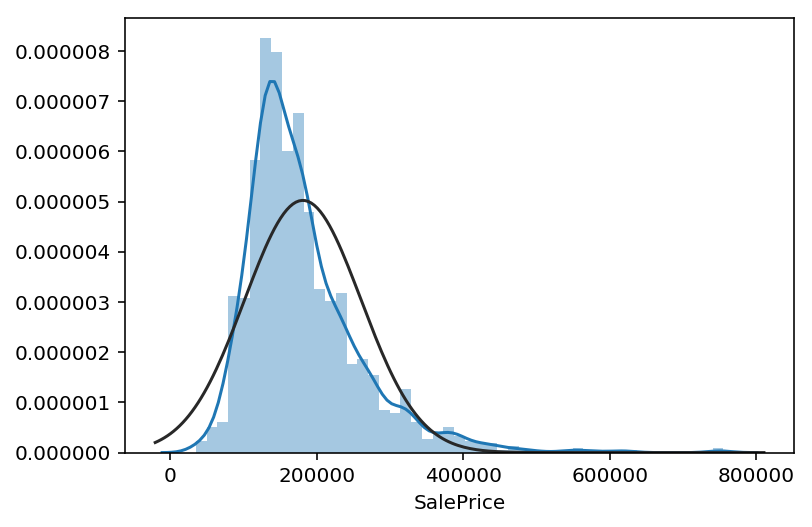

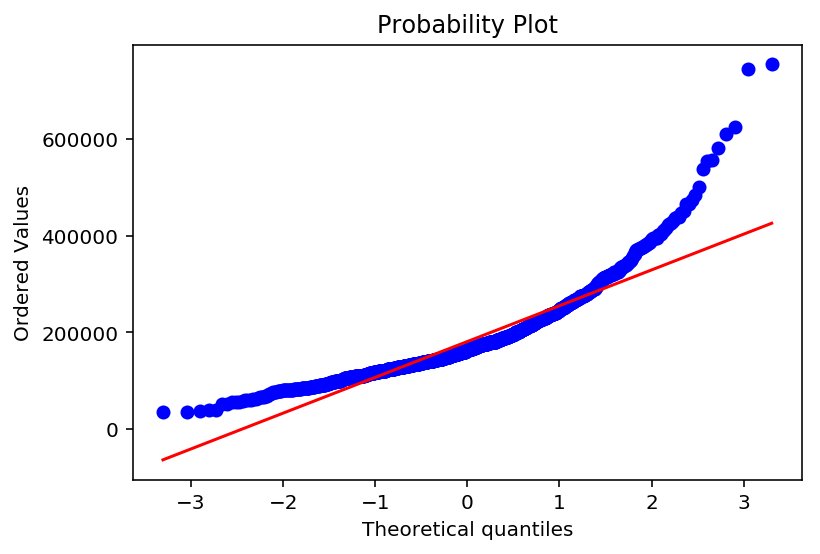

In [10]:
# Look at distribution of the target variable (i.e. sales price)
sns.distplot(train_df['SalePrice'] , fit=norm);

# Look at the QQ-plot which is another way to assess if data is normally distributed
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed as shown by the long right tail on the first graph. The second graph (the QQplot) is another way to visualize if a variable is normally distributed. If the dots deviate from the straight red line, then, it means that the data is not normally distributed. You can [read more about QQ plots here](https://data.library.virginia.edu/understanding-q-q-plots/).

We'll need to transform the target variable and make it more normally distributed.

#### Independent variables
We'll visualize the distribution for each variable. Same as for the target variable, we'd want to tranform the variables that are not normally distributed (above all if we want to use a linear regression) and / or remove the outliers (see section 3- Outliers).

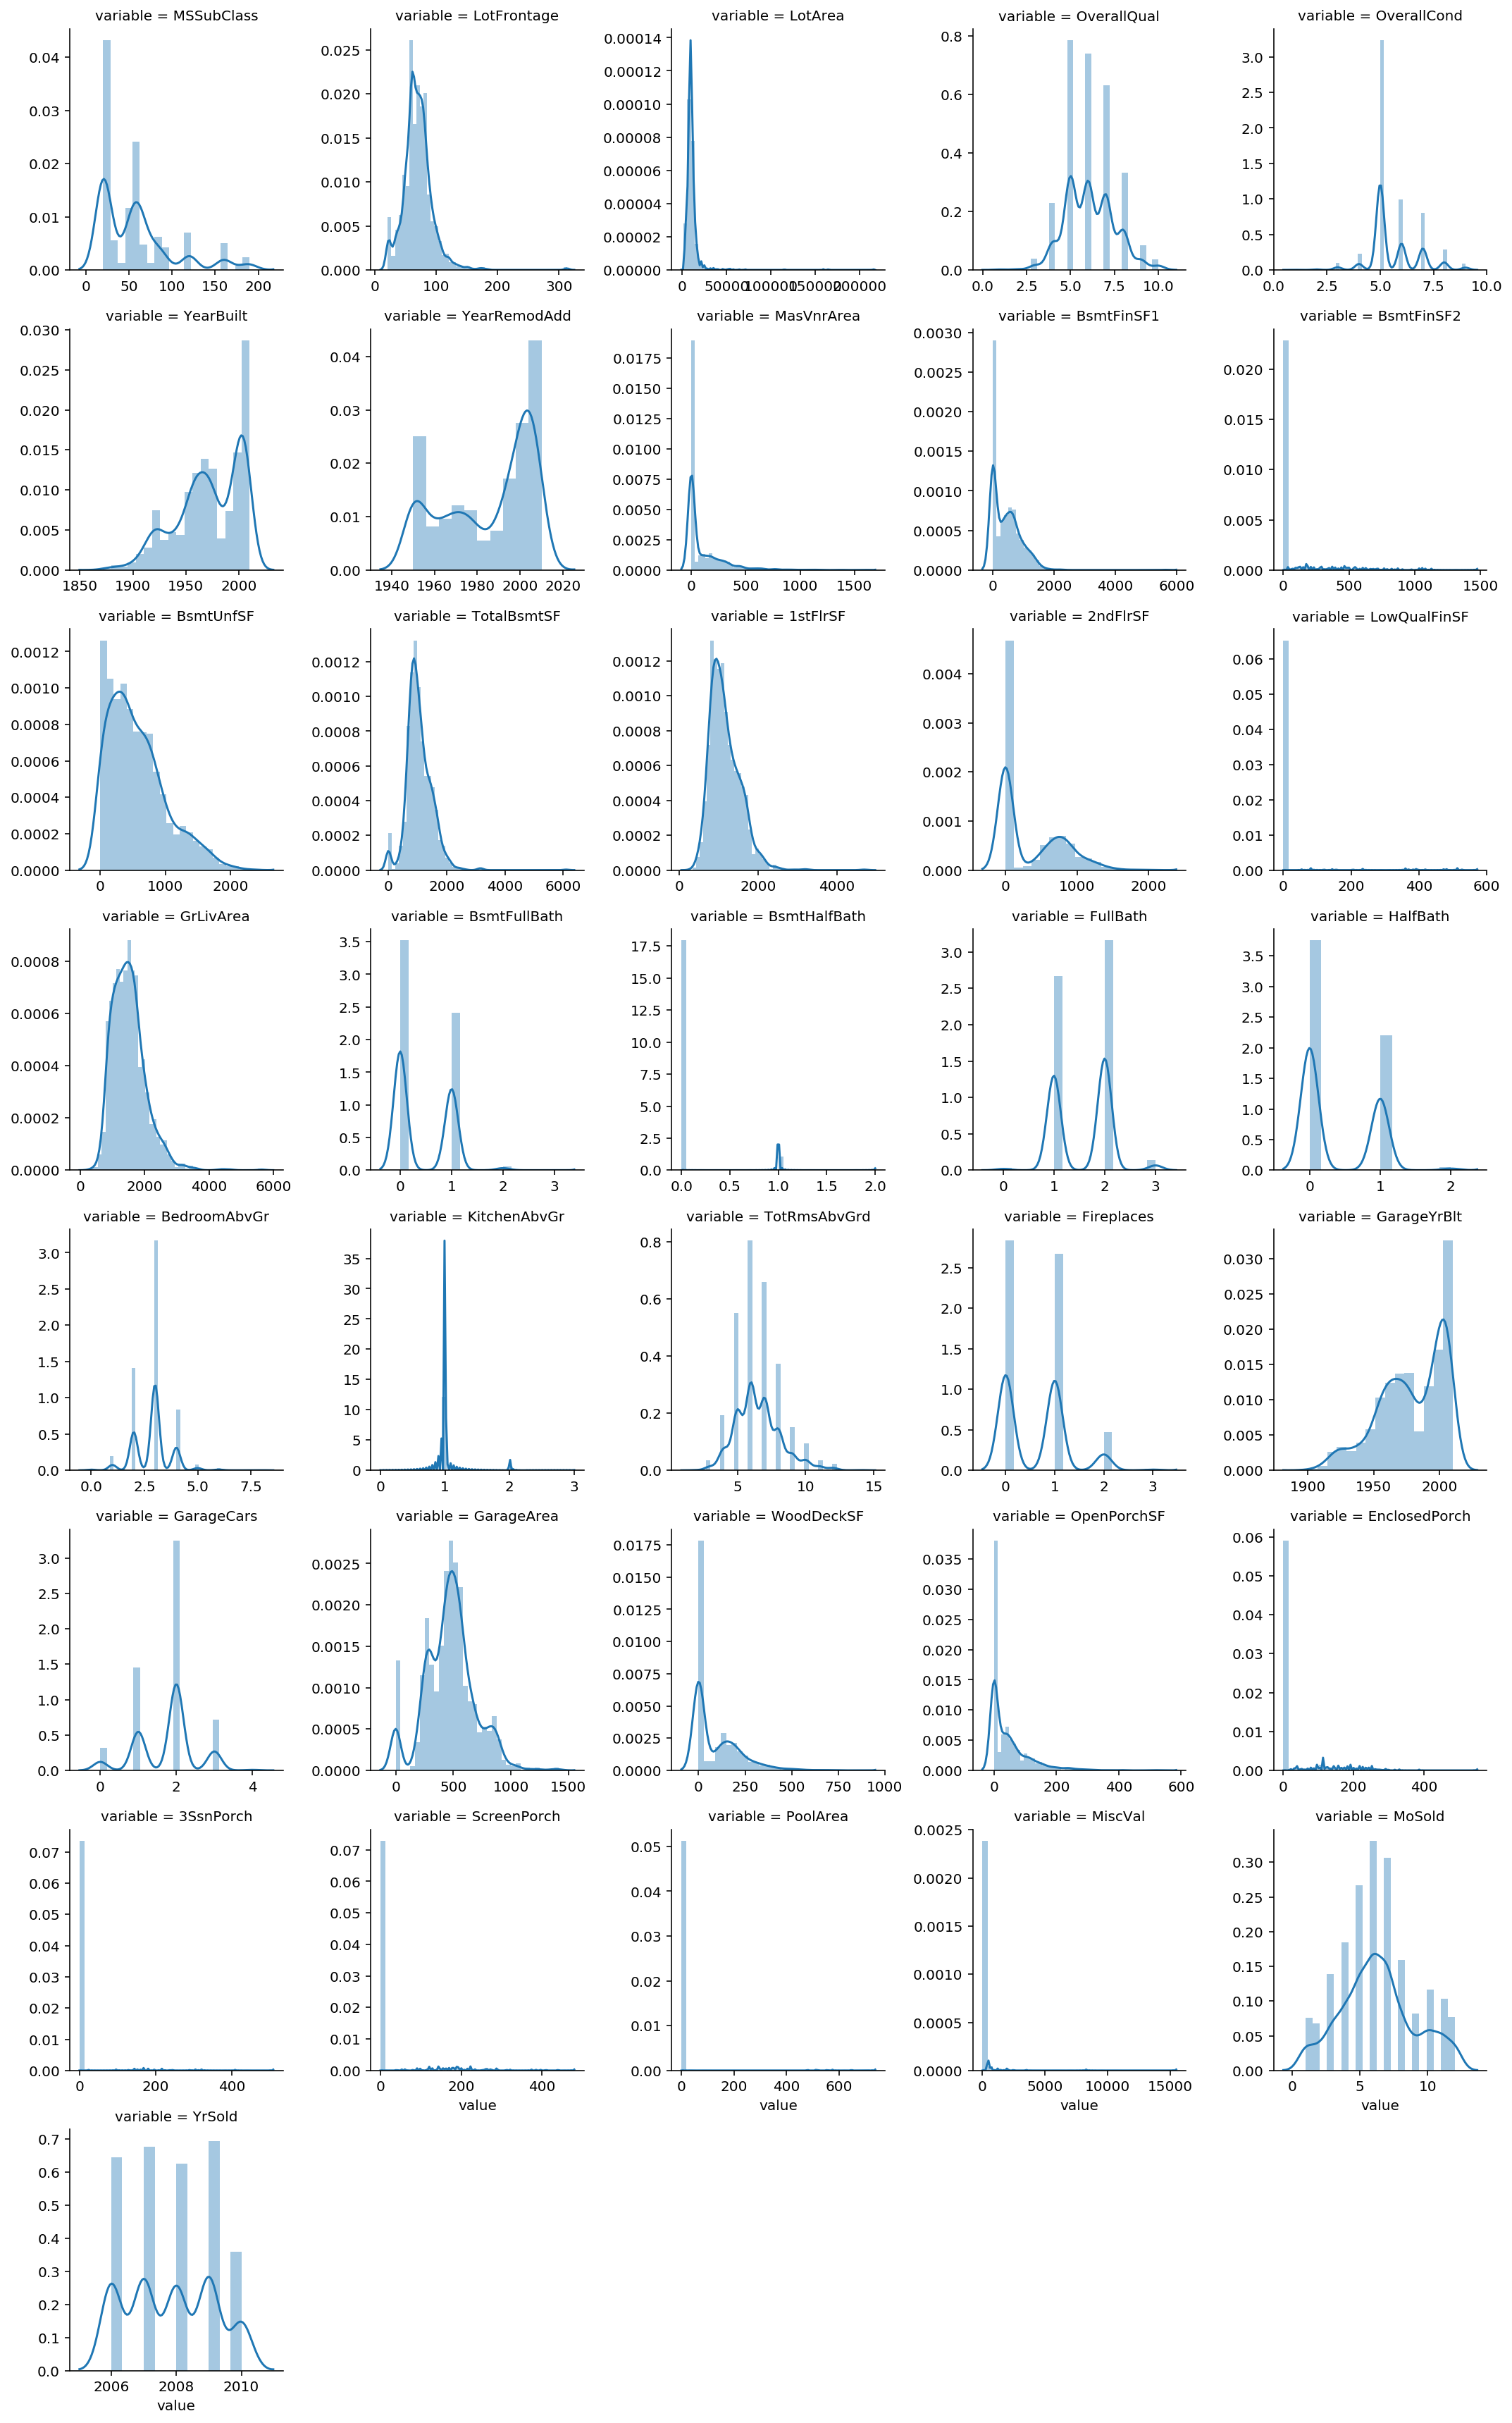

In [11]:
# .melt unpivots the table, making it easier to analyze each variable.
quant_vars_long = pd.melt(train_df, value_vars=quant_vars)

# Throwing this into a FacetGrid of distplots
facet_grid_quant = sns.FacetGrid(quant_vars_long, col="variable",  col_wrap=5, sharex=False, sharey=False)
facet_grid_quant = facet_grid_quant.map(sns.distplot, "value")

### 2- Missing Data

Time to look at missing data.  

In [14]:
nulls_sum = train_df.isnull().sum().sort_values(ascending=False)
nulls_percent = (100 * train_df.isnull().sum()/train_df.isnull().count()).round(1).sort_values(ascending=False)
nulls_overview = pd.concat([nulls_sum, nulls_percent], axis=1, keys=['Total', 'Percent'])
nulls_overview[nulls_overview['Total'] > 0]

Total  Percent
PoolQC         1453     99.5
MiscFeature    1406     96.3
Alley          1369     93.8
Fence          1179     80.8
FireplaceQu     690     47.3
LotFrontage     259     17.7
GarageCond       81      5.5
GarageType       81      5.5
GarageYrBlt      81      5.5
GarageFinish     81      5.5
GarageQual       81      5.5
BsmtExposure     38      2.6
BsmtFinType2     38      2.6
BsmtFinType1     37      2.5
BsmtCond         37      2.5
BsmtQual         37      2.5
MasVnrArea        8      0.5
MasVnrType        8      0.5
Electrical        1      0.1

Another way to look at null values using a trick from https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/

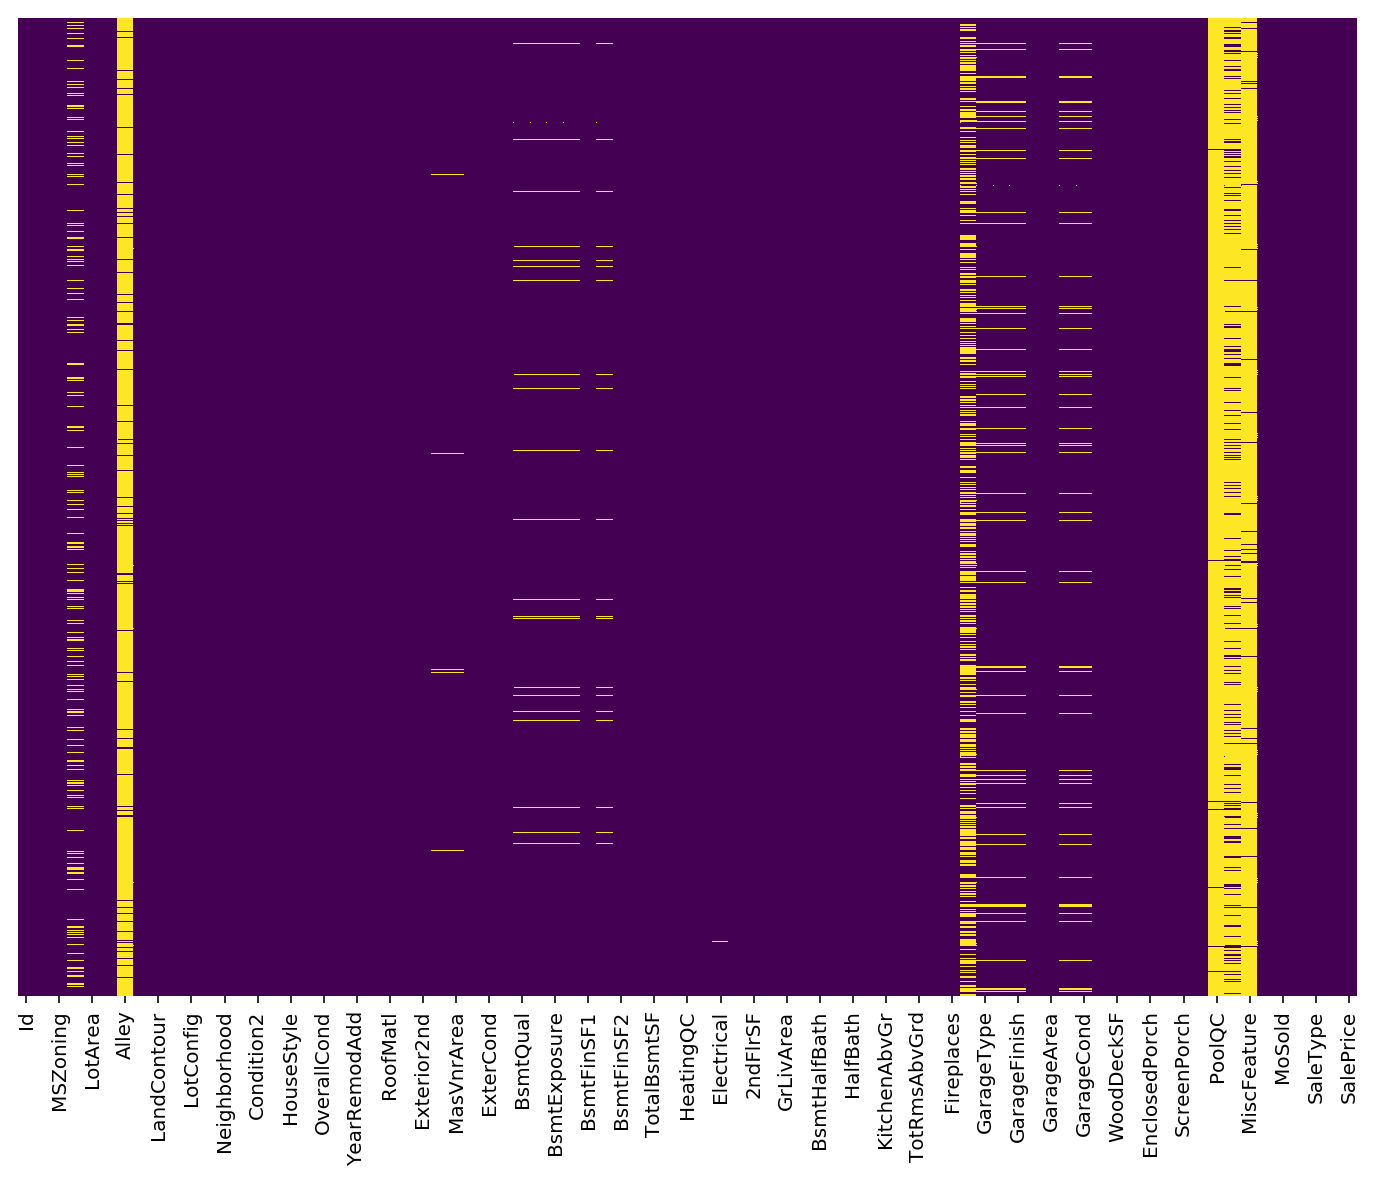

In [13]:
fig, axes = plt.subplots(figsize=(12, 9))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**BEST PRACTICE:** As [pointed out](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#257915) by [Wall-E](https://www.kaggle.com/shuhuagao), it's a good idea to read the [data_desription.txt](../input/data_description.txt) file before going about replacing NAs willy-nilly. For example, NA values in the `GarageType: Garage location` variable simply mean that there is no Garage, so we shouldn't be trying to impute some other value. (At least that's what I've understood.)

### 3- Outliers
We plan on using a simple linear regression. While some models such as Random Forest are pretty robust to outliers, linear models (e.g. Lasso, Linear Regression) are not. This means that we'd want to consider removing the outliers when cleaning the data. 

Another option is to make the models more robust to outliers. For example, we could use the `RobustScaler()` method for a Lasso or Elastic Net Regression, or choose **Huber** as the `loss` parameter in the Gradient Boosting Regression.

The latter may be preferred as they may also be outliers in the testing data. However, even if there were, we want our model to be as accurate as possible and outliers can jeopardize the accuracy of our model in the first place.

We'll look at a few plots to check outliers.

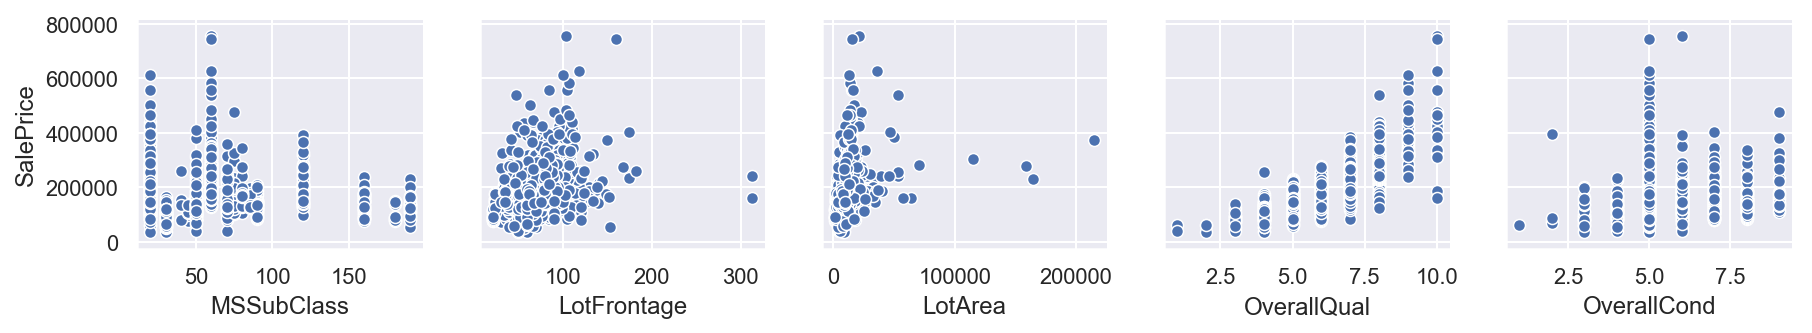

In [15]:
sns.set()
x_vars = quant_vars[0:5]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

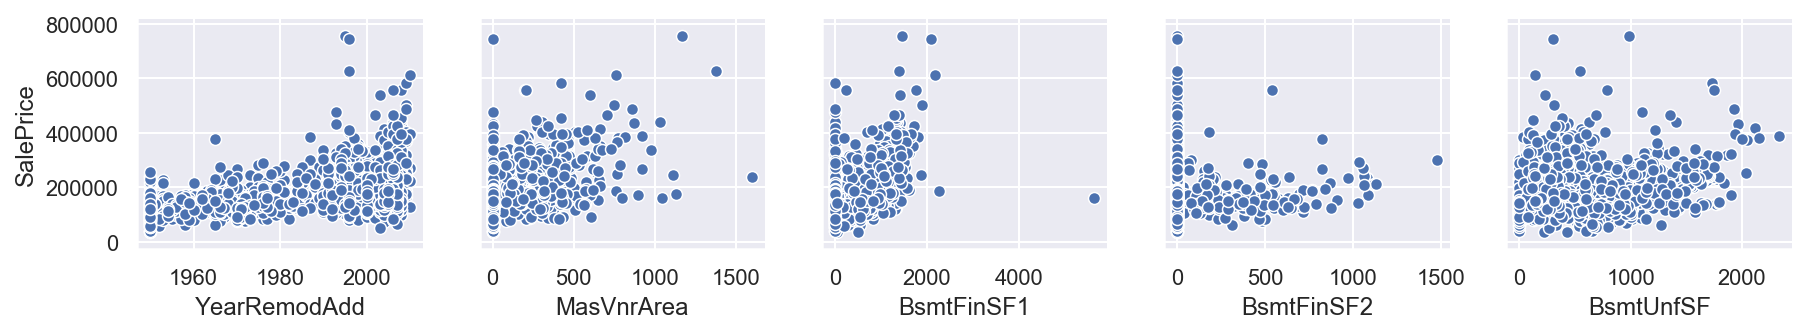

In [16]:
sns.set()
x_vars = quant_vars[6:11]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

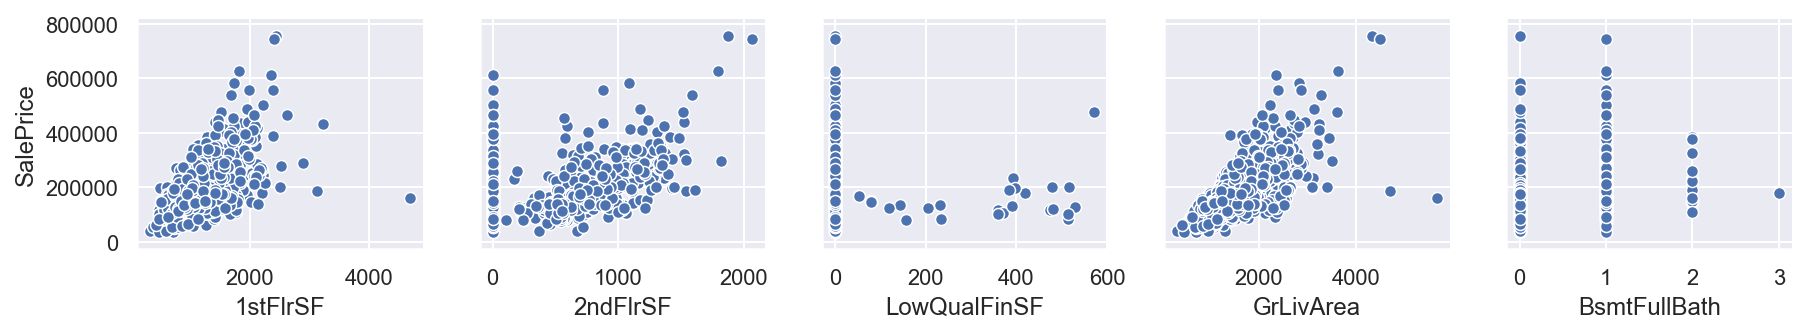

In [17]:
sns.set()
x_vars = quant_vars[12:17]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

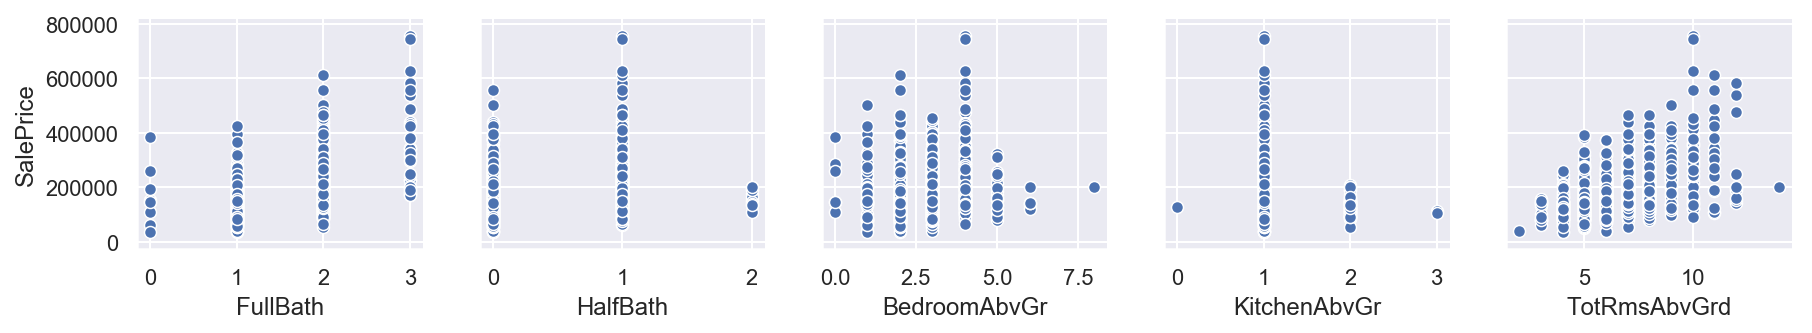

In [18]:
sns.set()
x_vars = quant_vars[18:23]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

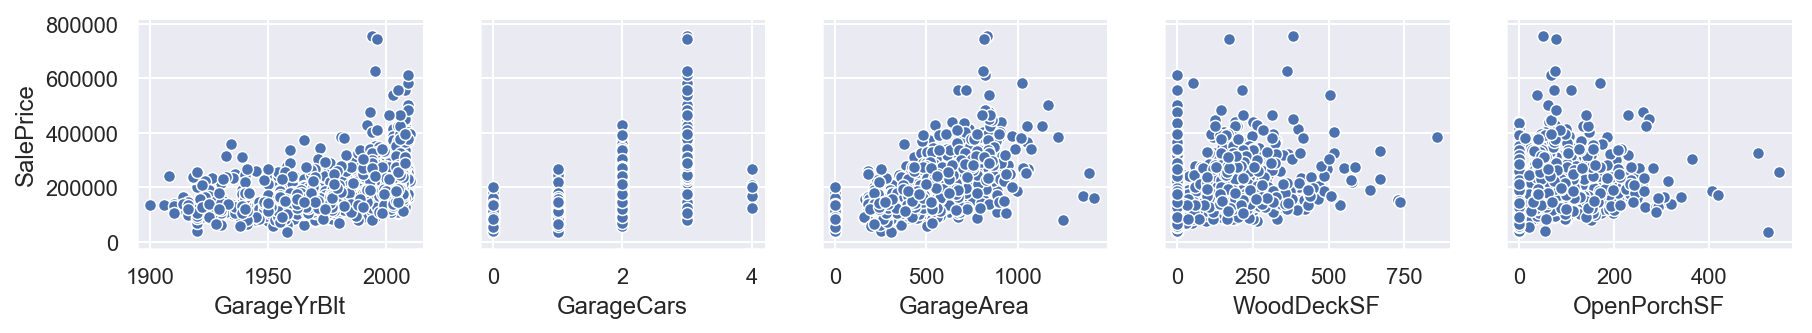

In [19]:
sns.set()
x_vars = quant_vars[24:29]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

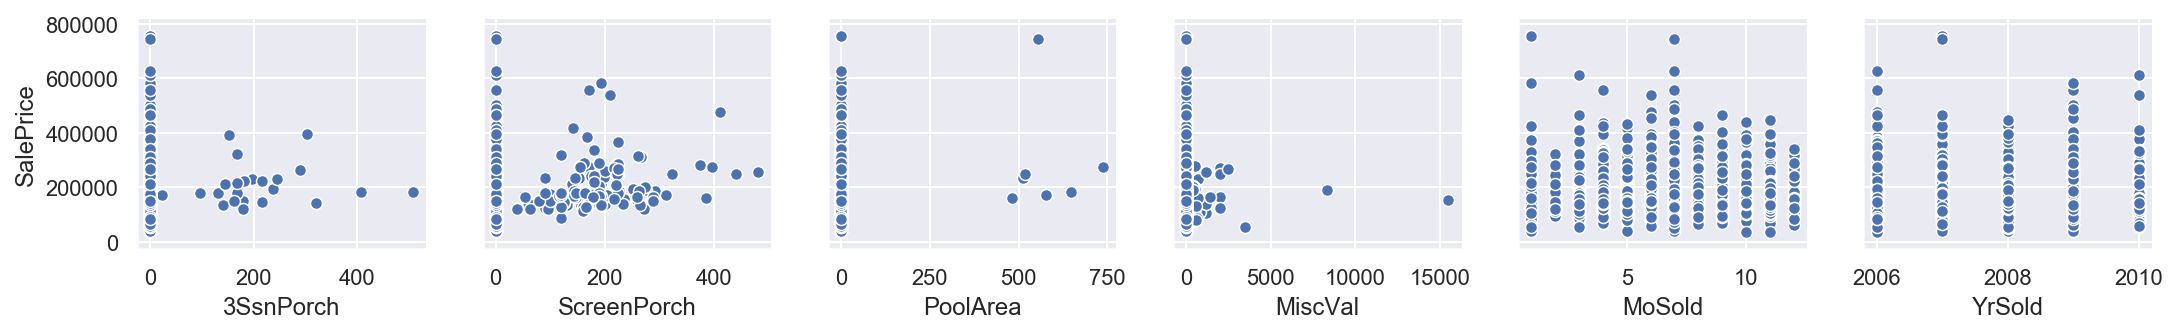

In [20]:
sns.set()
x_vars = quant_vars[30:36]
y_vars = ['SalePrice']
sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
plt.show()

In [21]:
# sns.set()
# x_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# y_vars = ['SalePrice']
# sns.pairplot(train_df, size = 2.5, x_vars = x_vars, y_vars = y_vars)
# plt.show()

We see that the variable `GrLivArea` has outlier values along with `TotalBsmtSF`. 
In particular, for the variable `GrLivArea`, there are two with extremely large GrLivArea that are at a low price (at the bottom right corner). These values are outliers and we will delete them when cleaning the data.

### 4- Data Correlation

This correlation matrix helps quickly find relationships between variables.

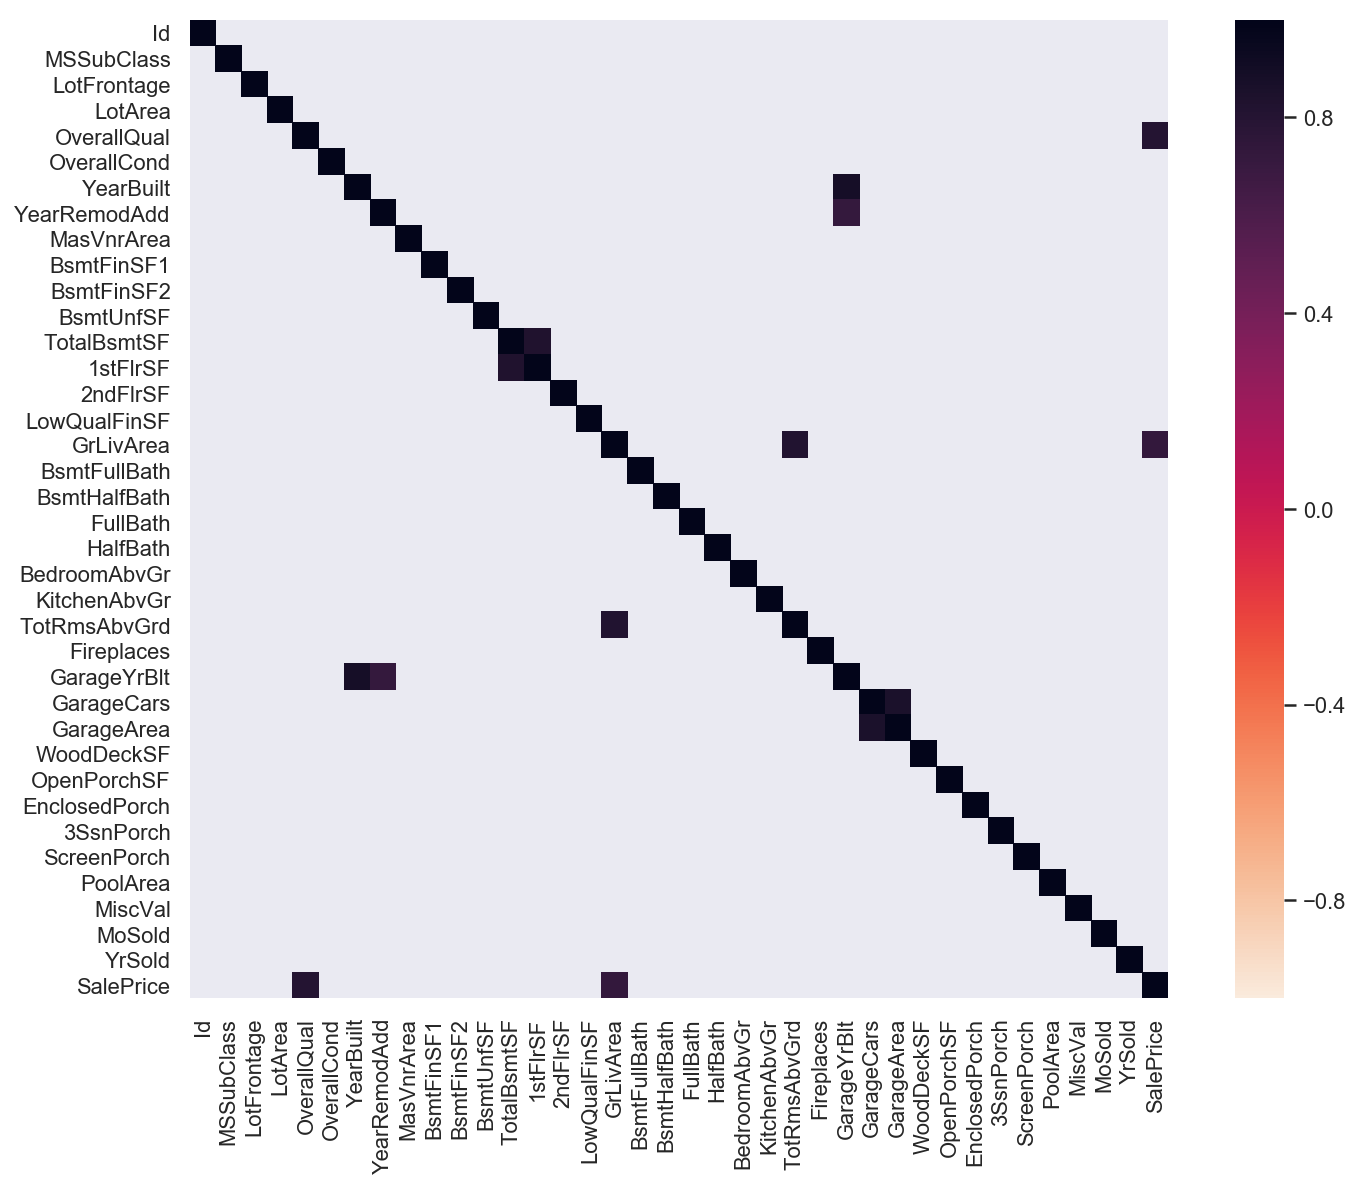

In [22]:
corr_mat = train_df.corr(method='spearman')
fig, axes = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat[(corr_mat >= 0.7) | (corr_mat <= -0.7)], vmax=1, vmin=-1, 
            square=True, cmap=sns.cm.rocket_r);

**CONCEPT:** Variables that are strongly correlated, such as with `TotalBsmtSF` and `1stFlrSF`, could be an example of **multicollinearity**, which I believe means we will need to consolidate these as a single attribute rather than keeping separate. 
Using some common sense, it's to be expected that `GarageCars` and `GarageArea` describe the same thing. 

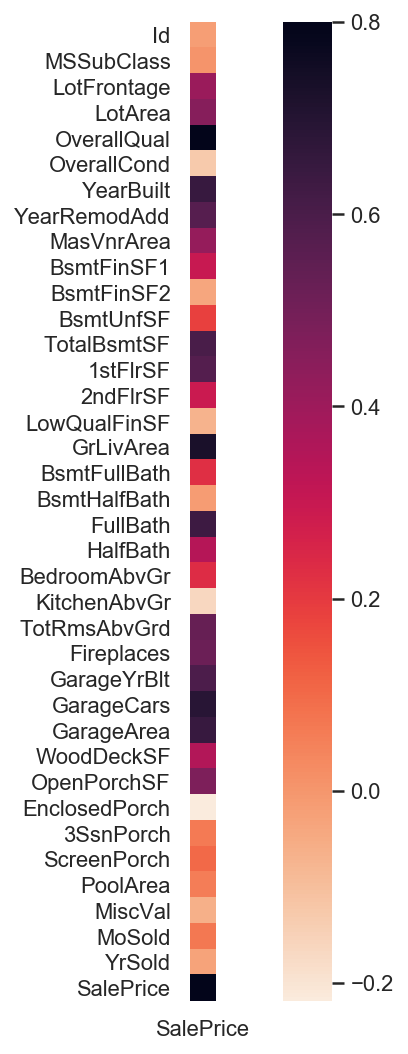

In [23]:
# Alternatively, to focus on SalePrice...
fig, axes = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat[['SalePrice']], vmax=.8, square=True, cmap=sns.cm.rocket_r)

In [24]:
# To clearly see these numerically...
# corr_mat = train_df.corr(method='spearman')
corr_mat.nlargest(10, 'SalePrice')[['SalePrice']]

SalePrice
SalePrice     1.000000
OverallQual   0.809829
GrLivArea     0.731310
GarageCars    0.690711
YearBuilt     0.652682
GarageArea    0.649379
FullBath      0.635957
TotalBsmtSF   0.602725
GarageYrBlt   0.593788
1stFlrSF      0.575408

#### Additional ways to look for relationships between variables:
1- Looking for linear relationships between variables using a pairplot:

This works better with quantitative variables. We select the variables that were highly correlated with the price.

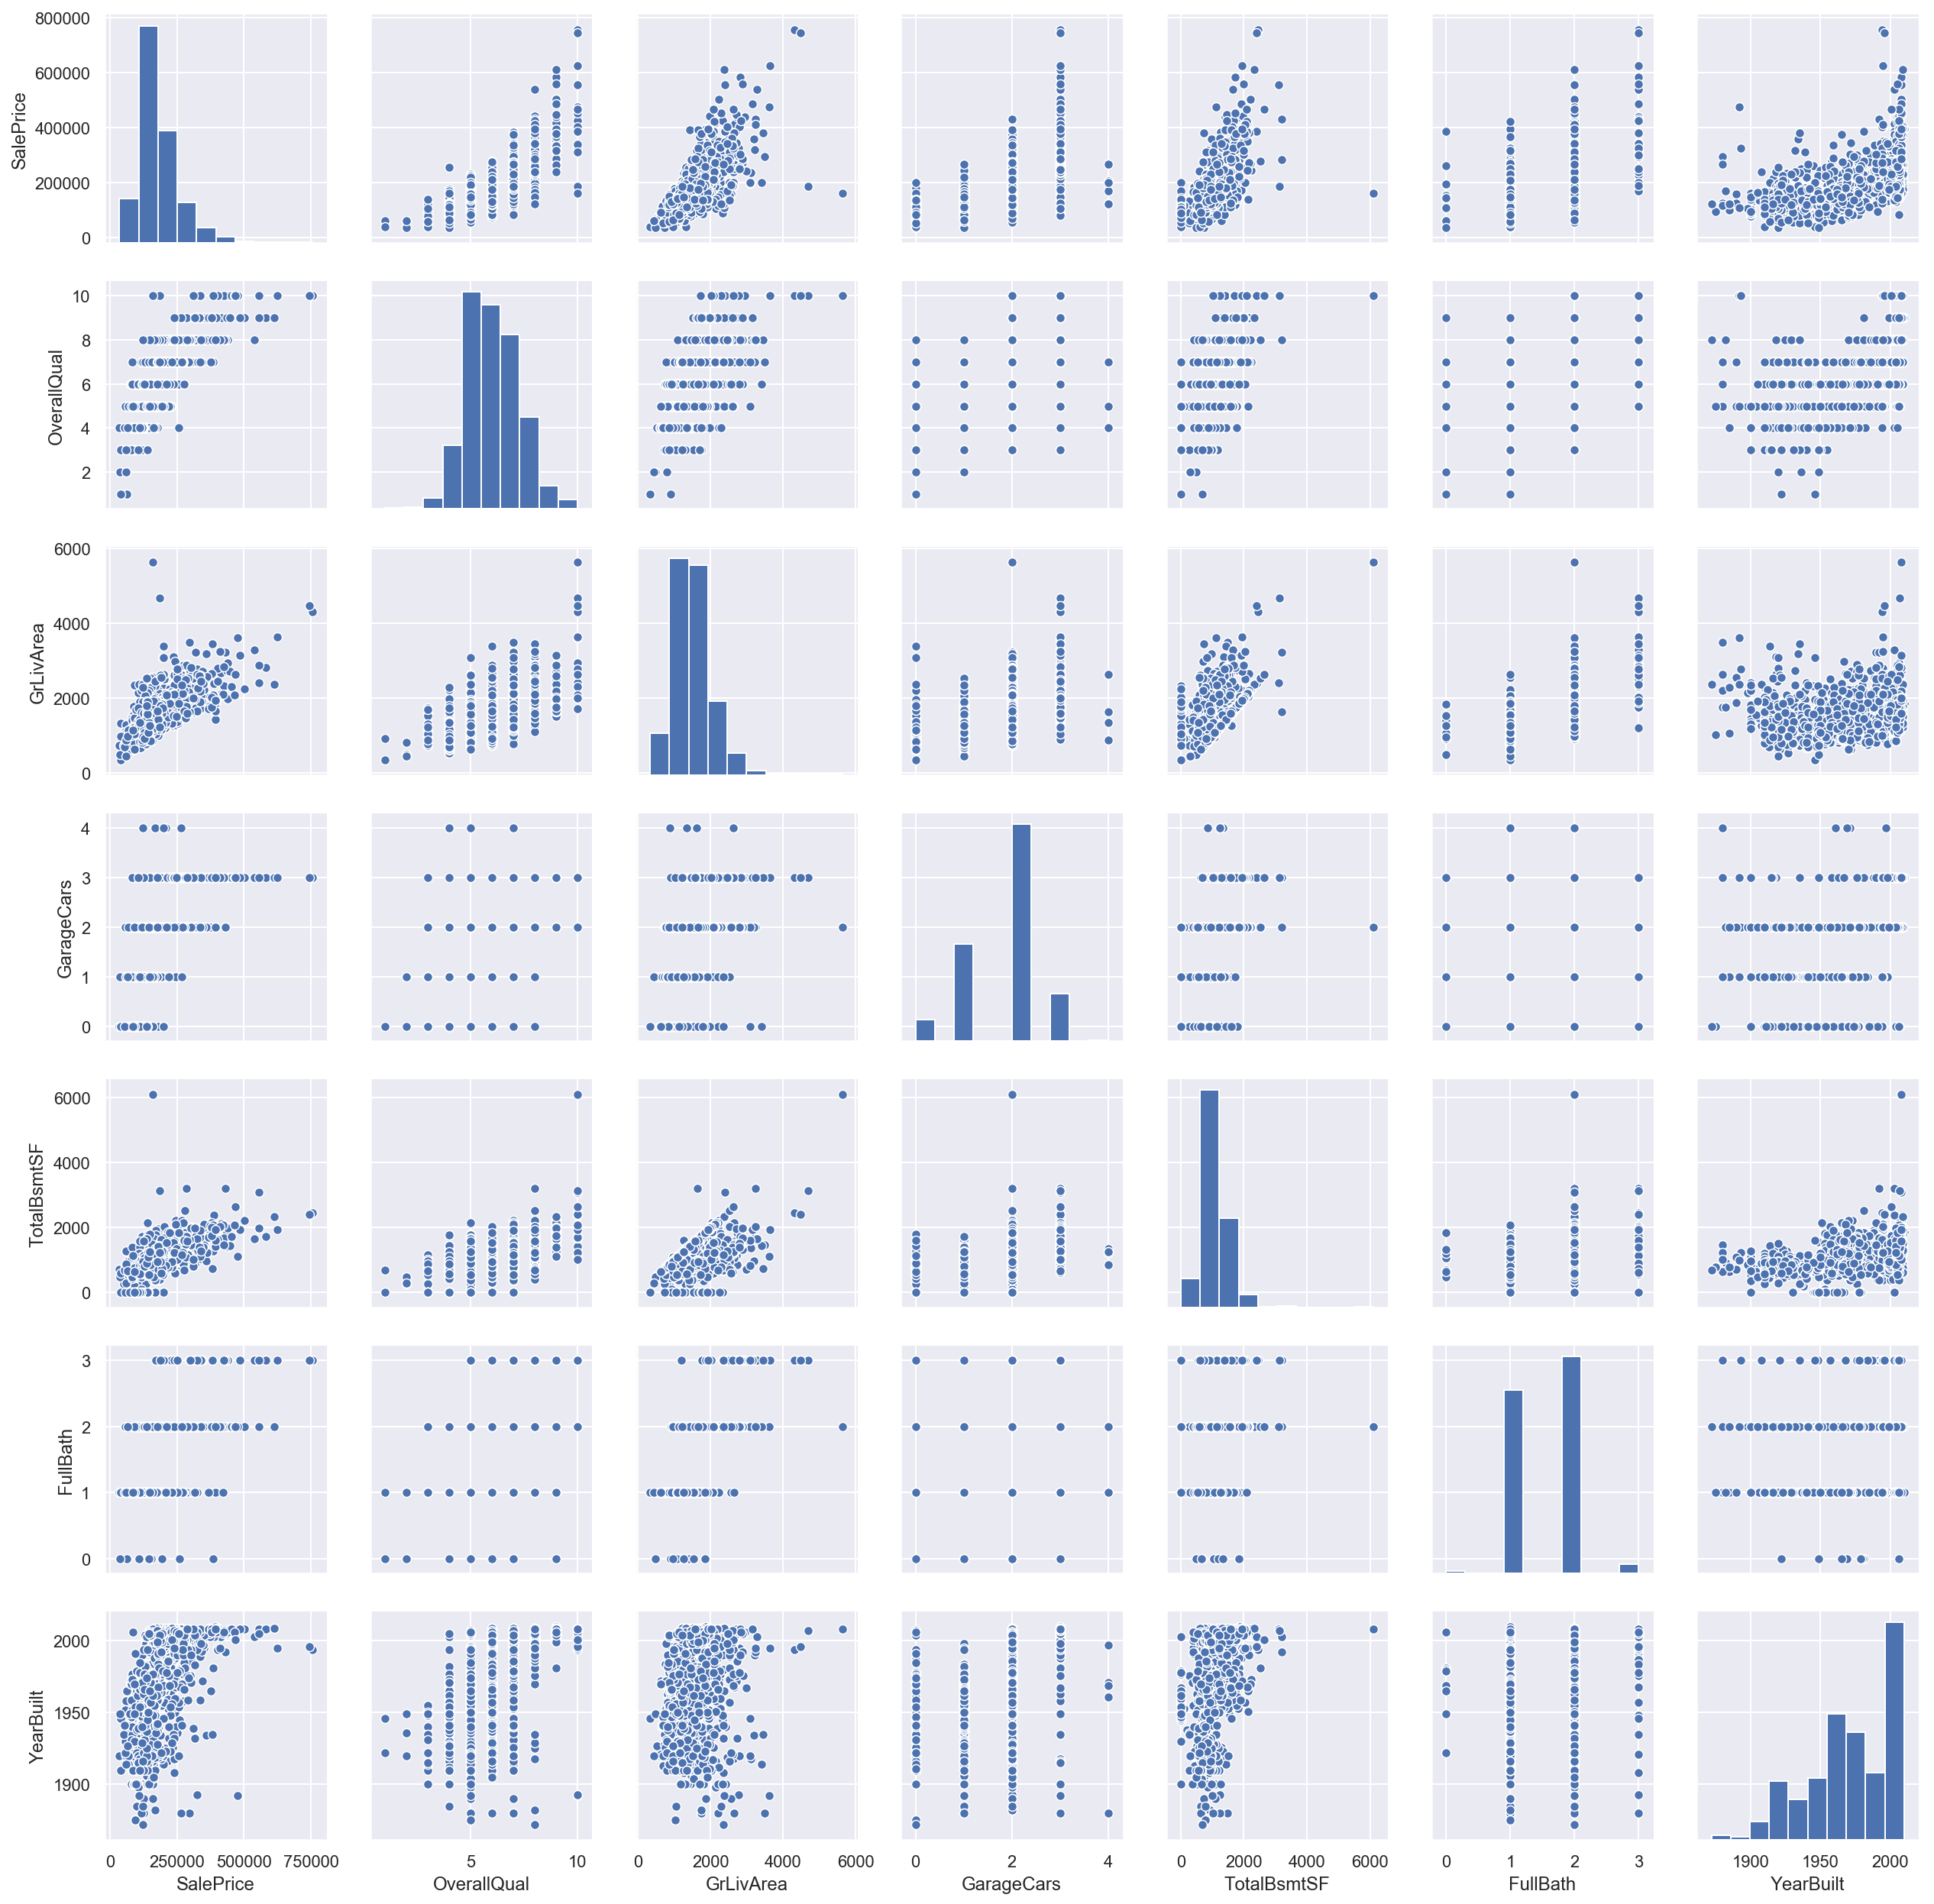

In [27]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

2- Looking at the relationships between qualitative variables and Sale Price:

We'll create a boxplot for each variable. 

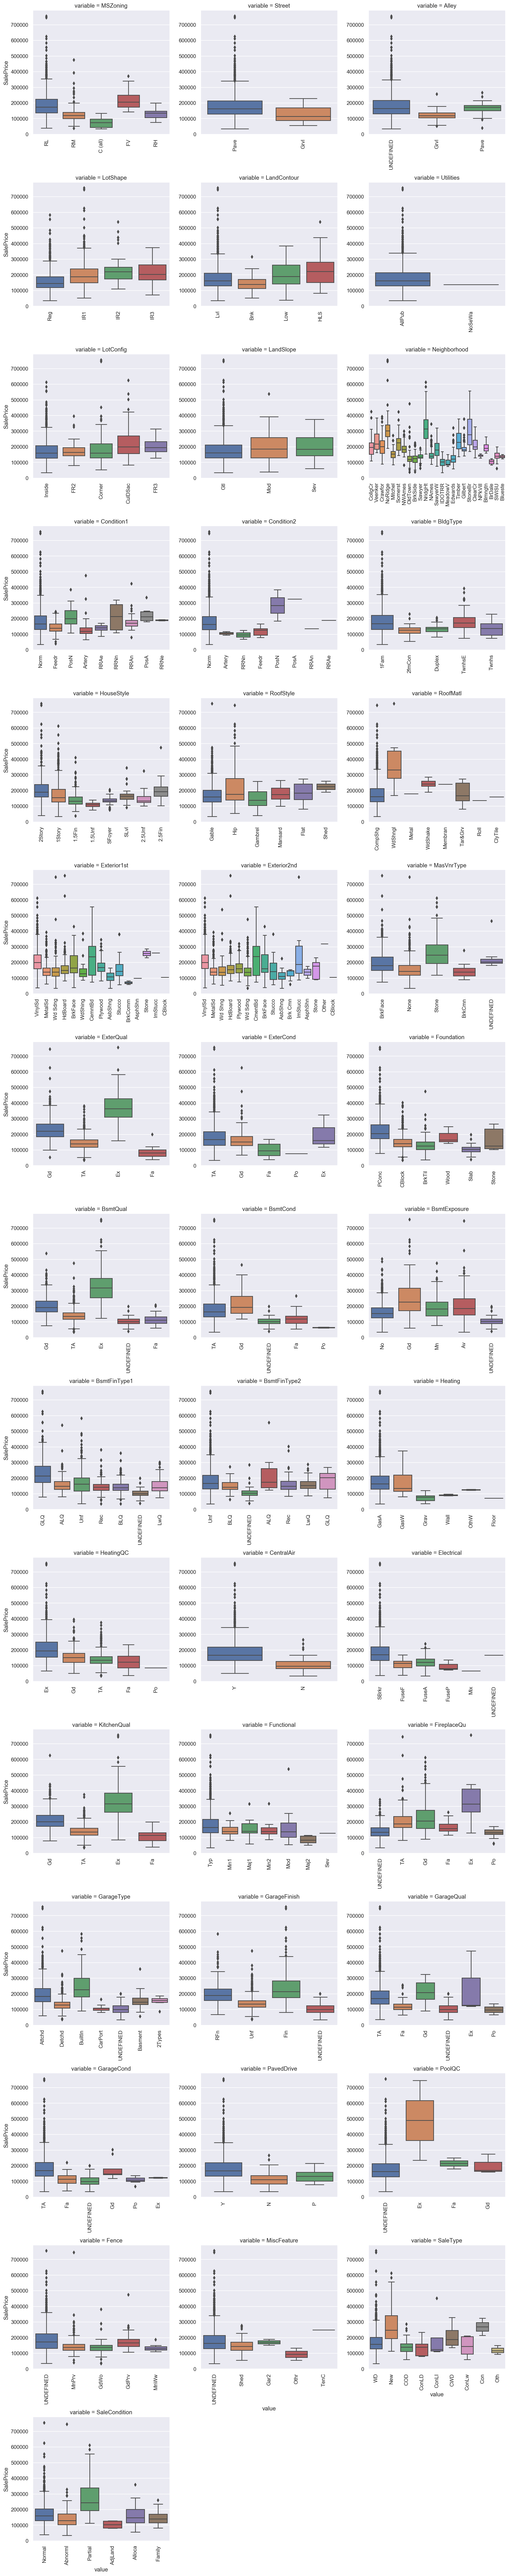

In [28]:
for column in qual_vars:
    train_df[column] = train_df[column].astype('category')
    if train_df[column].isnull().any():
        train_df[column] = train_df[column].cat.add_categories(['UNDEFINED'])
        train_df[column] = train_df[column].fillna('UNDEFINED')

def show_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
qual_vars_long = pd.melt(train_df, id_vars=['SalePrice'], value_vars=qual_vars)
facet_grid_qual = sns.FacetGrid(qual_vars_long, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
facet_grid_qual = facet_grid_qual.map(show_boxplot, "value", "SalePrice")

## Data Cleaning
Based on the data exploration above, we'll clean our data by transforming out target variable, replacing missing values, removing outliers and encoding categorical variables.

### 1- Transform Target Variable & Independent Variables
#### A- Target Variable
We'll perform a log tranformation of the target variable so that it follows a normal distribution. There are other ways and maybe more accurate ways to transform the target variable but we'll stick to the simple solution for now and make sure it works.

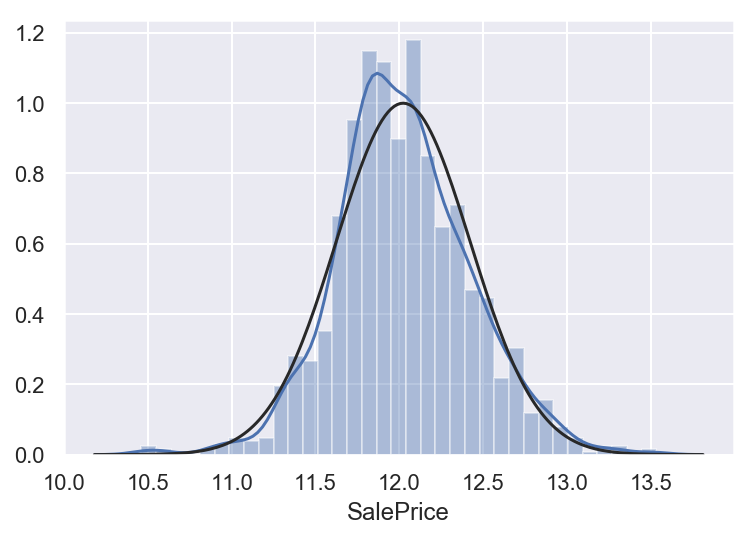

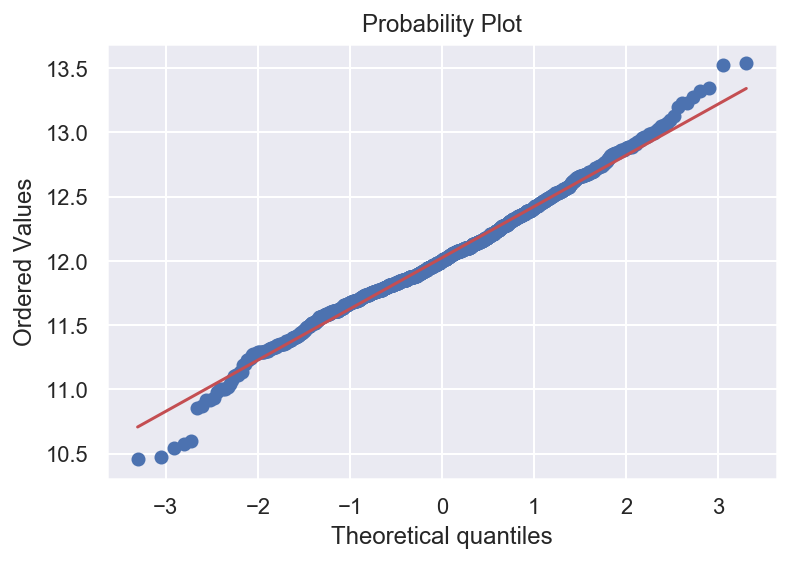

In [29]:
# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Check the new distribution with the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

We corrected the right skew. The target variable is now normally distributed.

#### B- Independent variables
We'll log tranform all the quantitative features. In theory, we should only do that for features that are not normally distributed but to make it easier for now, we'll do it for all.

In [30]:
for i in quant_vars:
    train_df[i] = train_df[i].apply(lambda x: np.log1p(x))

Making sure that the transformation was done correctly. For example, we see that the feature `GrLivArea` now follows a normal distribution.

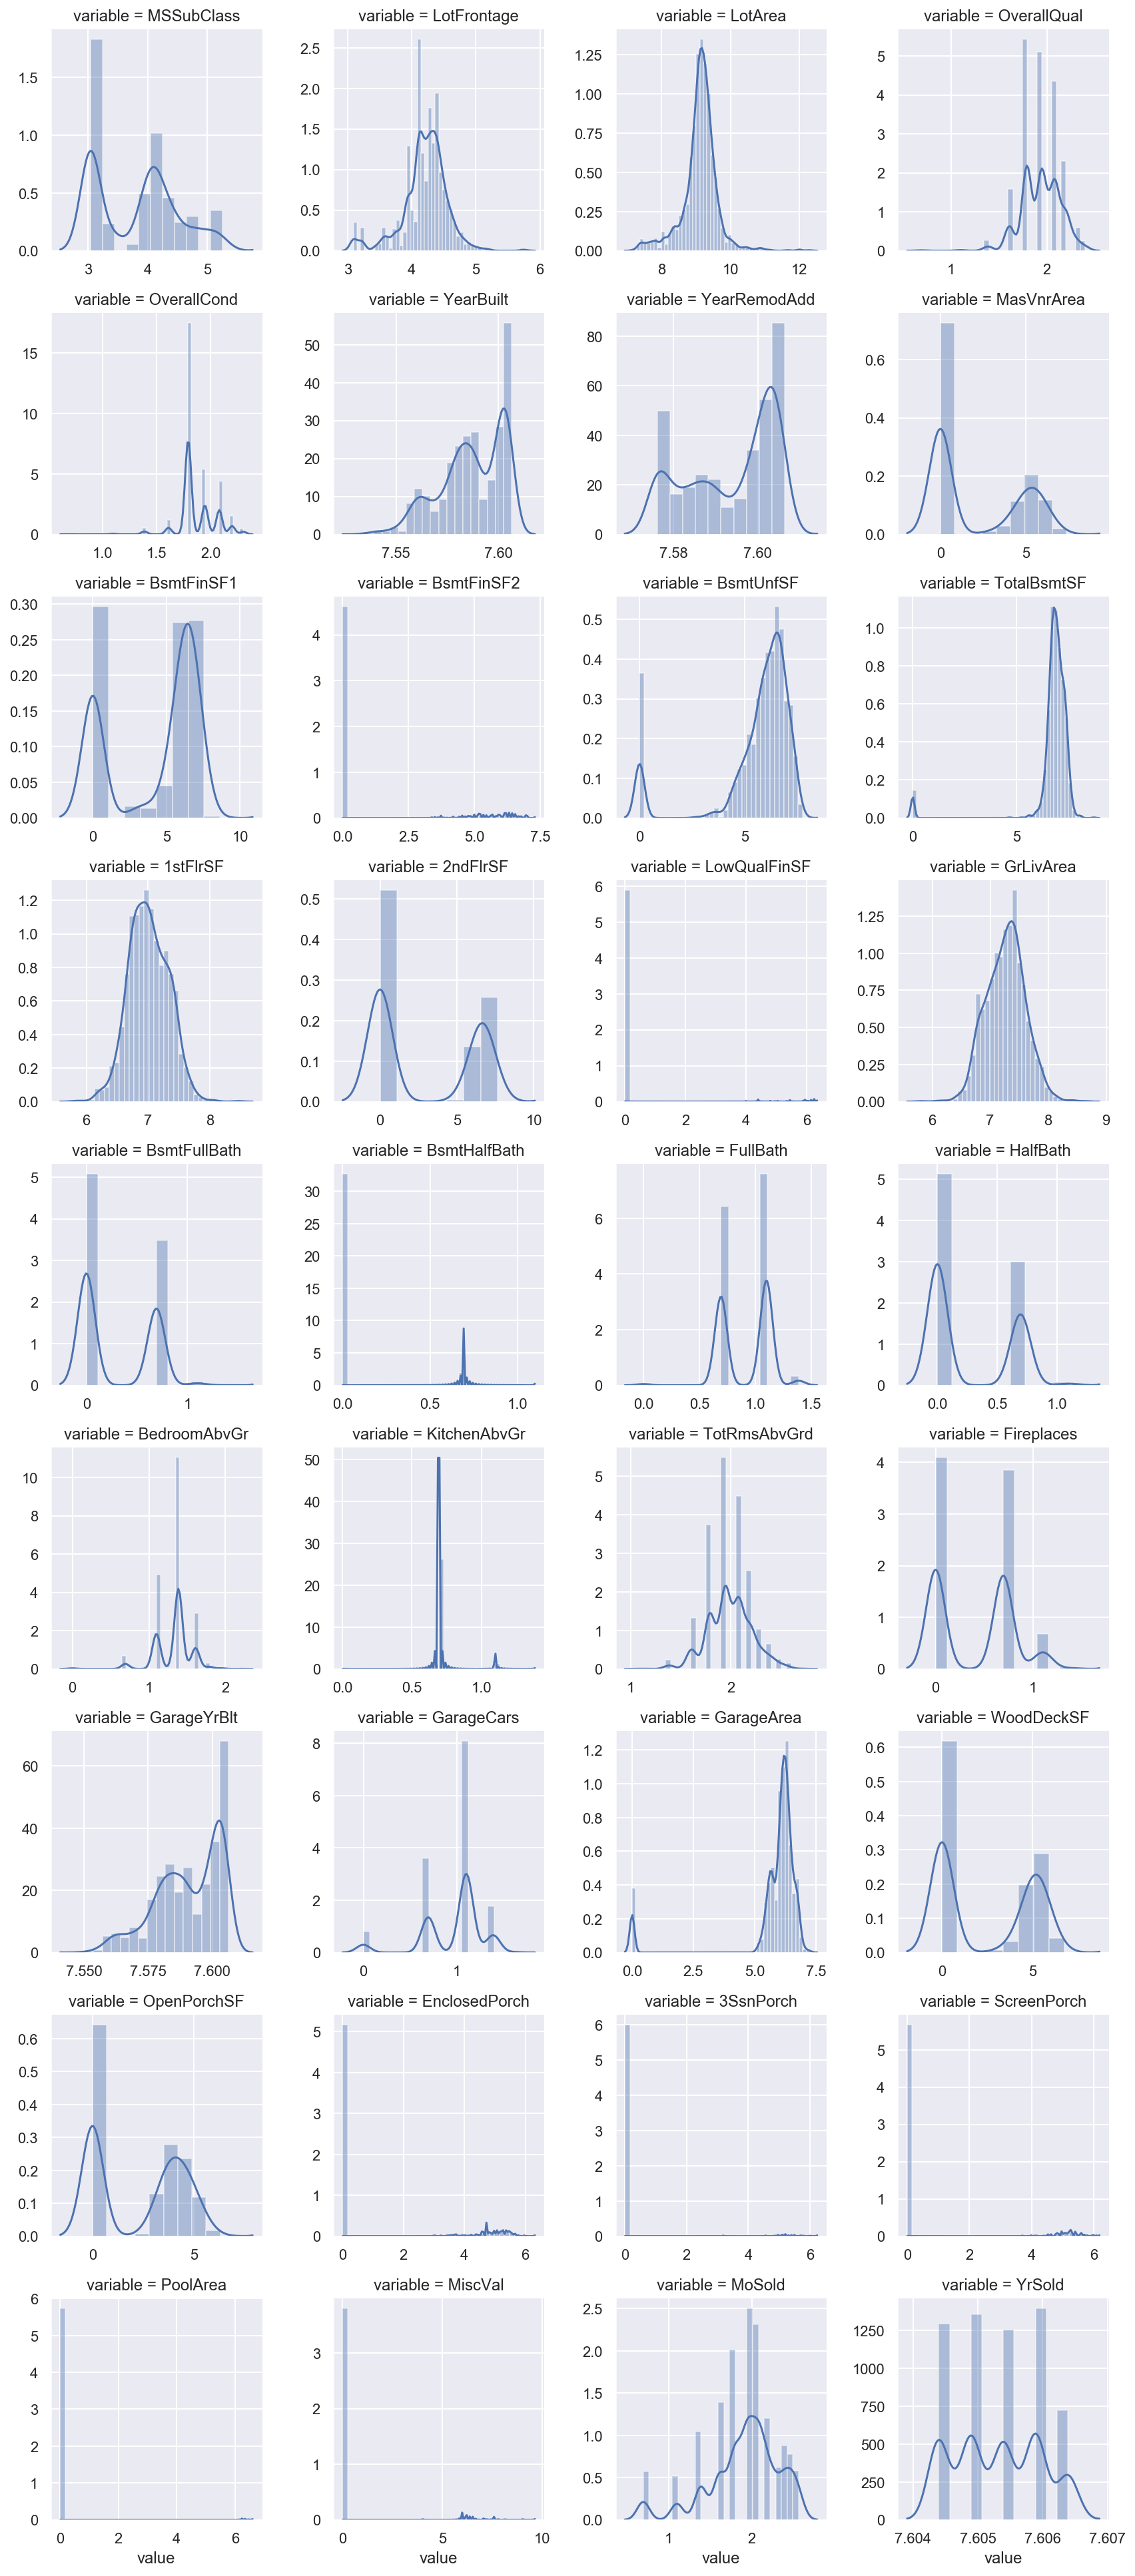

In [31]:
# .melt unpivots the table, making it easier to analyze each variable.
quant_vars_long = pd.melt(train_df, value_vars=quant_vars)

# Throwing this into a FacetGrid of distplots
facet_grid_quant = sns.FacetGrid(quant_vars_long, col="variable",  col_wrap=4, sharex=False, sharey=False)
facet_grid_quant = facet_grid_quant.map(sns.distplot, "value")

Now, let's standardize the numeric features.

In [32]:
scaler = StandardScaler()
scaler.fit(train_df[quant_vars])
scaled = scaler.transform(train_df[quant_vars])

for i, col in enumerate(quant_vars):
       train_df[col] = scaled[:,i]

scaled = scaler.fit_transform(test_df[quant_vars])

for i, col in enumerate(quant_vars):
      test_df[col] = scaled[:,i]

### 2- Impute Missing Values

### 3- Remove Outliers


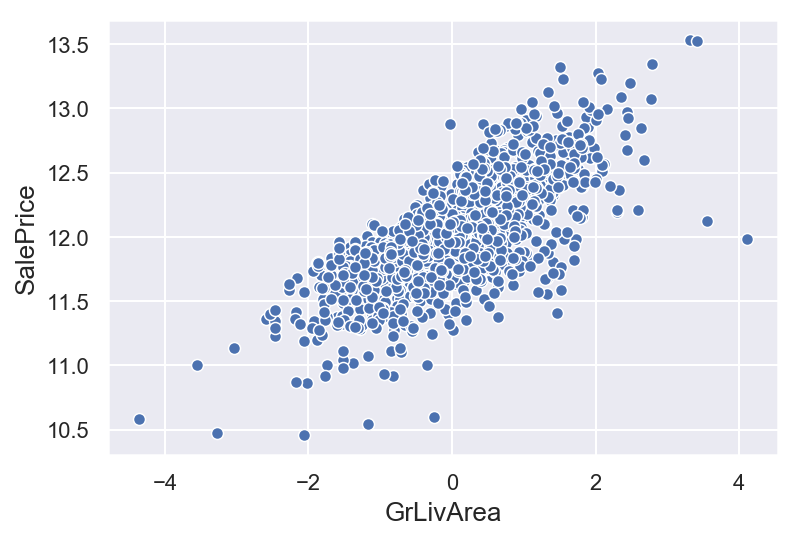

In [33]:
# Delete outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>6000)].index)

# Check the graphic again
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 4- Encode Categorical Variables

**NEXT:** We'll continue to follow along https://www.kaggle.com/dgawlik/house-prices-eda to encode these categorical variables.

The function below performs a one-way ANOVA test to see if the categories within each feature differs significantly re. the Sale Price. When the p-value is < 0.5%, then it proves that there is a significant difference between the categories re. their Sale Price. Thus, it would be valuable to encode the variables to account for the differences.

In [34]:
def get_anova(data):
    
    # Create new dataframe
    anova_df = pd.DataFrame()
    
    # Create a row per qualitative variable name
    anova_df['feature'] = qual_vars
    
    # Create empty list to hold p values
    p_values = []
    
    # Loop through qualitative variable name 
    # Example: 'Neighborhood'
    for qual_var in qual_vars:

        # Create empty list to hold 'samples' 
        # This will contain SalePrice values, grouped by unique values for the qualitative variable
        samples = []
        
        # Loop through unique values for the qualitative variable found in training data 
        # Example: (For Neighborhood) 'CollgCr'
        for unique_qual_val in data[qual_var].unique():
            
            # Get the SalePrice values for that categorical value
            # Example: (For Neighborhood.CollgCr [208500, 223500, 279500, 230000, 179900, ...]
            sample = data[data[qual_var] == unique_qual_val]['SalePrice'].values
            
            # Append this list of SalePrice values to the samples list of lists
            samples.append(sample)
        
        # Run a one-way ANOVA test comparing the SalePrice values per unique, qualitative value
        # Example: (For Neighborhood) 1.558600282771154e-225
            # The reason [1] is there is to grab only the p value since this is what is returned by f_oneway():
            # F_onewayResult(statistic=71.78486512058272, pvalue=1.558600282771154e-225)
        p_value = stats.f_oneway(*samples)[1]
        
        # Append the p value for the various SalePrice lists to the p_values list
        p_values.append(p_value)
    
    # Merge the p value series to the anova DataFrame
    anova_df['p_value'] = p_values
    return anova_df.sort_values('p_value')
        
anova_df = get_anova(train_df)
anova_df.sort_values('p_value').head()

feature        p_value
8   Neighborhood  4.041201e-243
18     ExterQual  6.930372e-195
21      BsmtQual  2.029970e-188
30   KitchenQual  4.438817e-187
34  GarageFinish  4.058066e-151

And then this happens...

In [35]:
anova_df['disparity'] = np.log(1./anova_df['p_value'].values)
anova_df.head()

feature        p_value   disparity
8   Neighborhood  4.041201e-243  558.131636
18     ExterQual  6.930372e-195  447.068180
21      BsmtQual  2.029970e-188  432.177977
30   KitchenQual  4.438817e-187  429.093024
34  GarageFinish  4.058066e-151  346.289642

Dividing `1` by the p value changes the magnitude if the p value so that smaller p value (which indicates significance) show a higher disparity between the categories within each feature.

In [36]:
np.log(1./anova_df['p_value'].values[0])

558.1316357906893

Plotting this gets us a chart showing the "disparity" in the SalePrice within each qualitative feature. It helps us understand which features are important (as the categories within these feature do have a significantly different price).

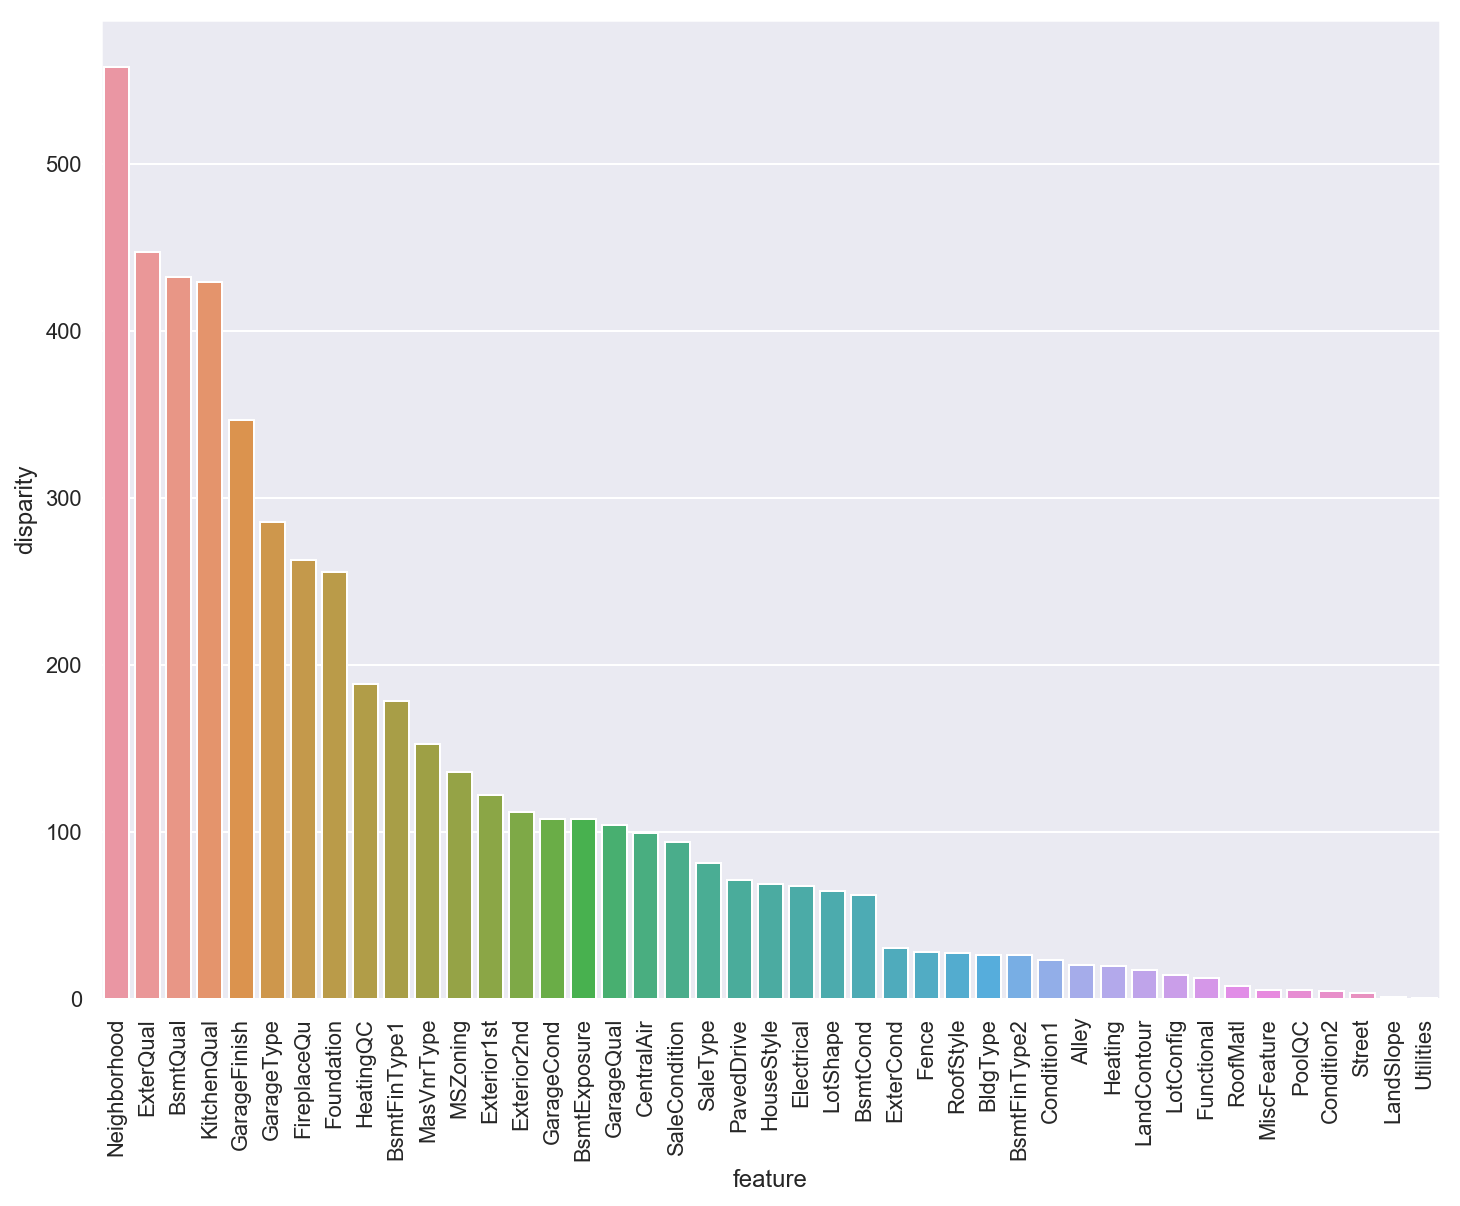

In [37]:
fig, axes = plt.subplots(figsize=(12, 9))
sns.barplot(data=anova_df, x='feature', y='disparity')
x=plt.xticks(rotation=90)

[Dgawlik](https://www.kaggle.com/dgawlik/) then encodes qualitative variables based on the mean of SalePrice for each unique value, ordered starting at 1. We'll use the median instead of the mean to prevent outliers from skewing the results.

In [38]:
def encode_qual_vars(data, qual_vars, suffix):

    # Create empty DataFrame for names of encoded qualitative variables and to use to look up later
    qual_vars_encoded = pd.DataFrame(columns=['Variable_Name','Encoded_Name','Value','Order'])
    encoded_df = data.copy();
    for qual_var in qual_vars:
        
        # Establish name for encoded version of qualitative variable and add it to list
        qual_var_encoded_name = qual_var + suffix
        qual_vars_encoded
        
        # Create empty DataFrame 
        order_df = pd.DataFrame()

        # Example: [CollgCr, Veenker, Crawfor, ...]
        order_df['val'] = data[qual_var].unique() 
        
        # Set index to unique variable value (as opposed to default 0,1,2,..)
        order_df.index = order_df.val  

        # Create column for mean of SalePrice grouped by unique qualitative value
        order_df['saleprice_median'] = data[[qual_var,'SalePrice']].groupby(qual_var)[['SalePrice']].median()

        # Sort by SalePrice
        order_df = order_df.sort_values('saleprice_median')

        # Create a column for the order of values, starting at 1
        order_df['order'] = range(1, len(order_df)+1)
    
        # Convert to dictionary to make it easy to iterate over
        order_df = order_df['order'].to_dict()
        
        # For each unique variable and its order... 
        for qual_val, order in order_df.items():
            # ... Get the matching rows in train_df, 
            # and insert an encoded version of the variable column name with suffix ,
            # and set value as the order of that value as established above
            encoded_df.loc[encoded_df[qual_var] == qual_val, qual_var_encoded_name] = order
            qual_vars_encoded = qual_vars_encoded.append({'Variable_Name': qual_var, 'Encoded_Name': qual_var_encoded_name, 'Value': qual_val, 'Order': order}, ignore_index=True)
    return (encoded_df, qual_vars_encoded)

train_df = pd.read_csv('../input/train.csv')
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
# qual_vars = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
train_df_encoded, qual_vars_encoded = encode_qual_vars(train_df, qual_vars, '_QE')
qual_vars_encoded.head(10)

FileNotFoundError: [Errno 2] File b'../input/train.csv' does not exist: b'../input/train.csv'

In [39]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street      Alley LotShape  \
0   1    0.424462       RL    -0.050433 -0.133270   Pave  UNDEFINED      Reg   
1   2   -1.125202       RL     0.541314  0.113413   Pave  UNDEFINED      Reg   
2   3    0.424462       RL     0.078009  0.420049   Pave  UNDEFINED      IR1   
3   4    0.645073       RL    -0.278068  0.103317   Pave  UNDEFINED      IR1   
4   5    0.424462       RL     0.680593  0.878431   Pave  UNDEFINED      IR1   

  LandContour Utilities  ...  PoolArea     PoolQC      Fence MiscFeature  \
0         Lvl    AllPub  ... -0.069393  UNDEFINED  UNDEFINED   UNDEFINED   
1         Lvl    AllPub  ... -0.069393  UNDEFINED  UNDEFINED   UNDEFINED   
2         Lvl    AllPub  ... -0.069393  UNDEFINED  UNDEFINED   UNDEFINED   
3         Lvl    AllPub  ... -0.069393  UNDEFINED  UNDEFINED   UNDEFINED   
4         Lvl    AllPub  ... -0.069393  UNDEFINED  UNDEFINED   UNDEFINED   

    MiscVal    MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0 -0.190481 -1.909325  0.139106        WD         Normal  12.247699  
1 -0.190481 -0.279901 -0.614252        WD         Normal  12.109016  
2 -0.190481  0.920928  0.139106        WD         Normal  12.317171  
3 -0.190481 -1.909325 -1.367986        WD        Abnorml  11.849405  
4 -0.190481  1.537684  0.139106        WD         Normal  12.429220  

[5 rows x 81 columns]

Then a Spearman correlation is conducted: 
> Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. - https://www.kaggle.com/dgawlik/house-prices-eda

In [40]:
def get_correlation(data):
    var_correlations = pd.DataFrame()
    var_correlations['variables'] = data.drop(columns=['Id','SalePrice']).columns
    fig, plot = plt.subplots(1, 1,figsize=(5, 0.25*len(var_correlations['variables'])))
    fig.subplots_adjust(wspace=0.4)
    var_correlations['spearman'] = [data[var].corr(data['SalePrice'], method='spearman') for var in var_correlations['variables']]
    var_correlations = var_correlations.sort_values('spearman')
    sns.barplot(data=var_correlations, y='variables', x='spearman', orient='h', ax=plot)
    return var_correlations
    
all_var_corr = get_correlation(train_df_encoded.drop(columns=qual_vars))


NameError: name 'train_df_encoded' is not defined

In [41]:
high_corr_vars = all_var_corr[(all_var_corr['spearman'] >= 0.4) | (all_var_corr['spearman'] <= -0.4)]['variables'].values
high_corr_vars

NameError: name 'all_var_corr' is not defined

In [42]:
low_corr_vars = all_var_corr[(all_var_corr['spearman'] <= 0.1) & (all_var_corr['spearman'] >= -0.1)]['variables'].values
low_corr_vars

NameError: name 'all_var_corr' is not defined

First, let's get a baseline for where we are without doing too much more clean-up work... 

In [43]:
def encode_qual_vars_test(data, qual_vars_encoded):
    for encoded_index, encoded_row in qual_vars_encoded.iterrows():
        variable = encoded_row['Variable_Name']
        encoded_name = encoded_row['Encoded_Name']
        value = encoded_row['Value']
        order = encoded_row['Order'] 
        data.loc[data[variable] == value, encoded_name] = order
    return data

def encode_qual_vars_train(data, qual_vars, suffix):
    qual_vars_encoded = pd.DataFrame(columns=['Variable_Name','Encoded_Name','Value','Order'])
    encoded_df = data.copy()
    for qual_var in qual_vars:
        qual_var_encoded_name = qual_var + suffix
        qual_vars_encoded
        order_df = pd.DataFrame()
        order_df['val'] = data[qual_var].unique() 
        order_df.index = order_df.val  
        order_df['saleprice_median'] = data[[qual_var,'SalePrice']].groupby(qual_var)[['SalePrice']].median()
        order_df = order_df.sort_values('saleprice_median')
        order_df['order'] = range(1, len(order_df)+1)
        order_df = order_df['order'].to_dict()
        for qual_val, order in order_df.items():
            encoded_df.loc[encoded_df[qual_var] == qual_val, qual_var_encoded_name] = order
            qual_vars_encoded = qual_vars_encoded.append({'Variable_Name': qual_var, 'Encoded_Name': qual_var_encoded_name, 'Value': qual_val, 'Order': order}, ignore_index=True)
    return (encoded_df, qual_vars_encoded)

def encode_qual(train, test):
    qual_vars = [f for f in train.columns if train.dtypes[f] == 'object']
   
    # Training Data
    train, qual_vars_encoded = encode_qual_vars_train(train, qual_vars, '_QE')
    train = train.drop(columns=qual_vars)
    
    # Test Data
    test = encode_qual_vars_test(test, qual_vars_encoded)
    test = test.drop(columns=qual_vars)
    
    return (train, test)

### 5- Additional Cleaning
#### Change Type of some Variables
The variable `MoSold` is an integer. This may confuse the model into thinking that is a numerical variable with Dec (12) being 12 times more valuable than Jan (1).

## Feature Engineering

### Create Binary Variables
#### Features: Month Sold & Year Sold

The features `MoSold` and `YrSold` may not be valuable in themselves. 

- It may be a good idea to see if prices are higher for some months and create a binary feature `is_high_seasonal_month`.
- One hypothesis is that the prices in 2008-2009 (during the recession) were lower. If so, adding a column `is_recession_year` would prove to be very valuable.

Let's look at the price of the houses over the year to see if there is some seasonality and maybe a crash in prices in 2008 and 2009.
We'll combine the month and year into a datetime feature. To use the `pd.to_datetime` method, we need to provide a year, month but also day. We'll create a column with 1 for the day of sale.

In [44]:
date_sold_df = train_df.assign(DaySold=1)
date_sold_df['DateSold'] = pd.to_datetime(dict(year=date_sold_df['YrSold'], 
                                               month=date_sold_df['MoSold'], 
                                               day=date_sold_df['DaySold']))


plt.figure(figsize=(16,4))
sns.lineplot(x='DateSold', y='SalePrice', data=date_sold_df);

ValueError: cannot assemble the datetimes: time data 1201 does not match format '%Y%m%d' (match)

Another way to visualize housing prices by month and year (via a heatmap).

In [46]:
date_sold_full_heatmap = date_sold_df[['YrSold', 'MoSold', 'SalePrice']]\
        .pivot_table(index = 'YrSold', columns = 'MoSold', values = 'SalePrice', aggfunc='median')

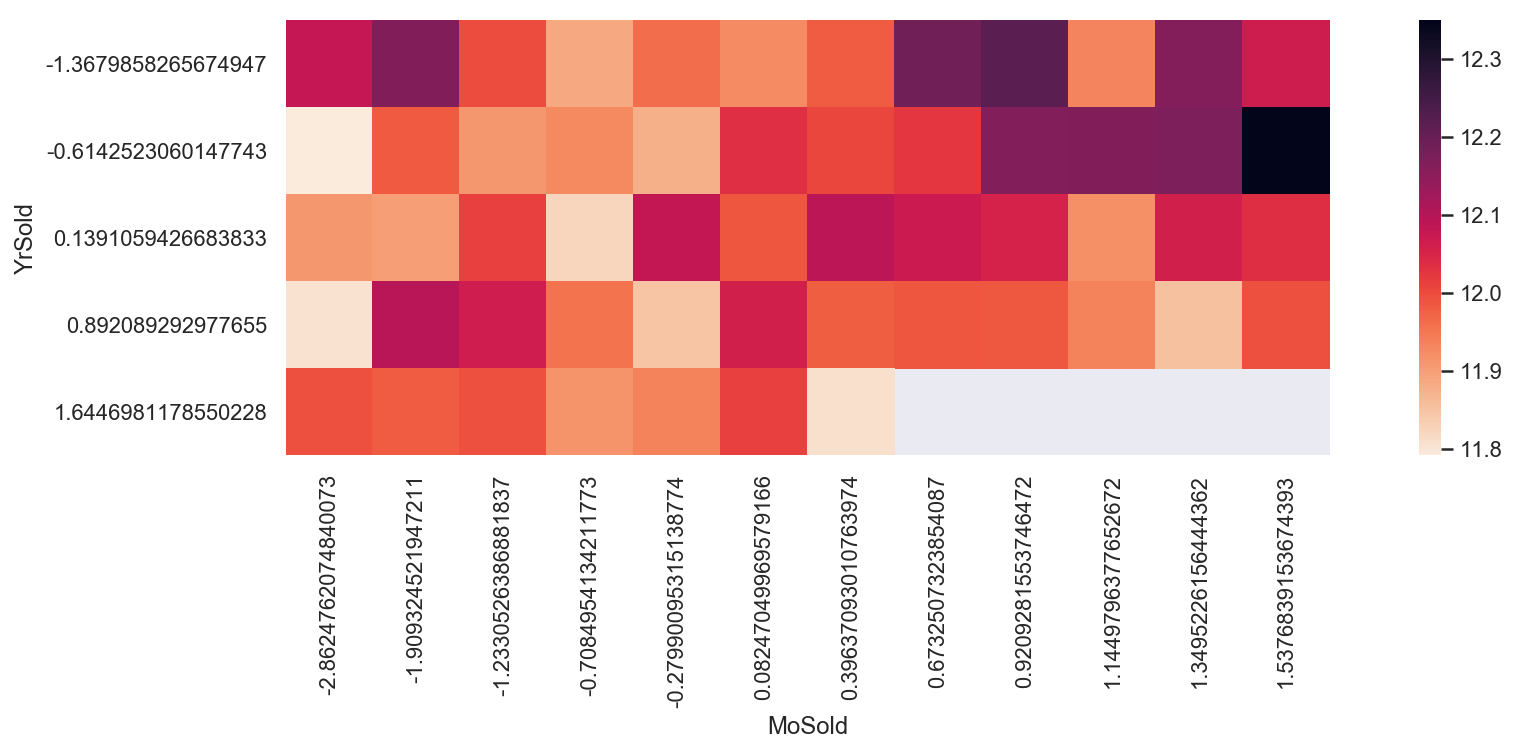

In [47]:
plt.figure(figsize=(16,4))
sns.heatmap(date_sold_full_heatmap,square=True, cmap=sns.cm.rocket_r);

There does not seem to be a monthly seasonality or a crash in prices in 2008-2009.
Another way to visualize how the price varies by month or year is to use boxplots.

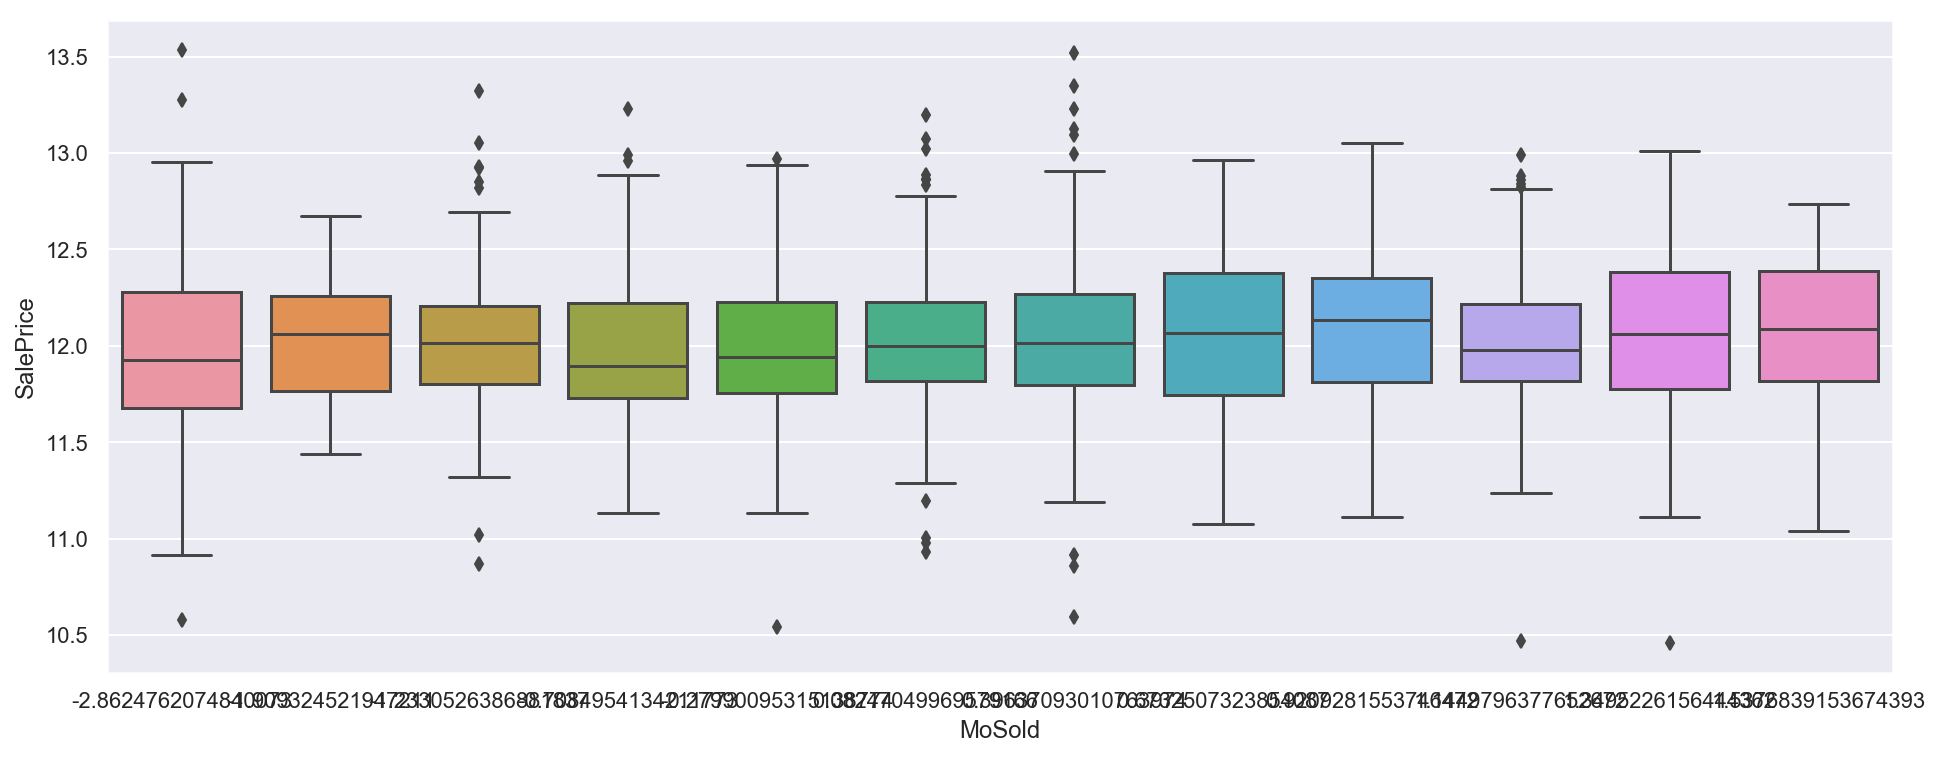

In [48]:
plt.figure(figsize=(16,6))
sns.boxplot(x='MoSold', y='SalePrice', data=date_sold_df);

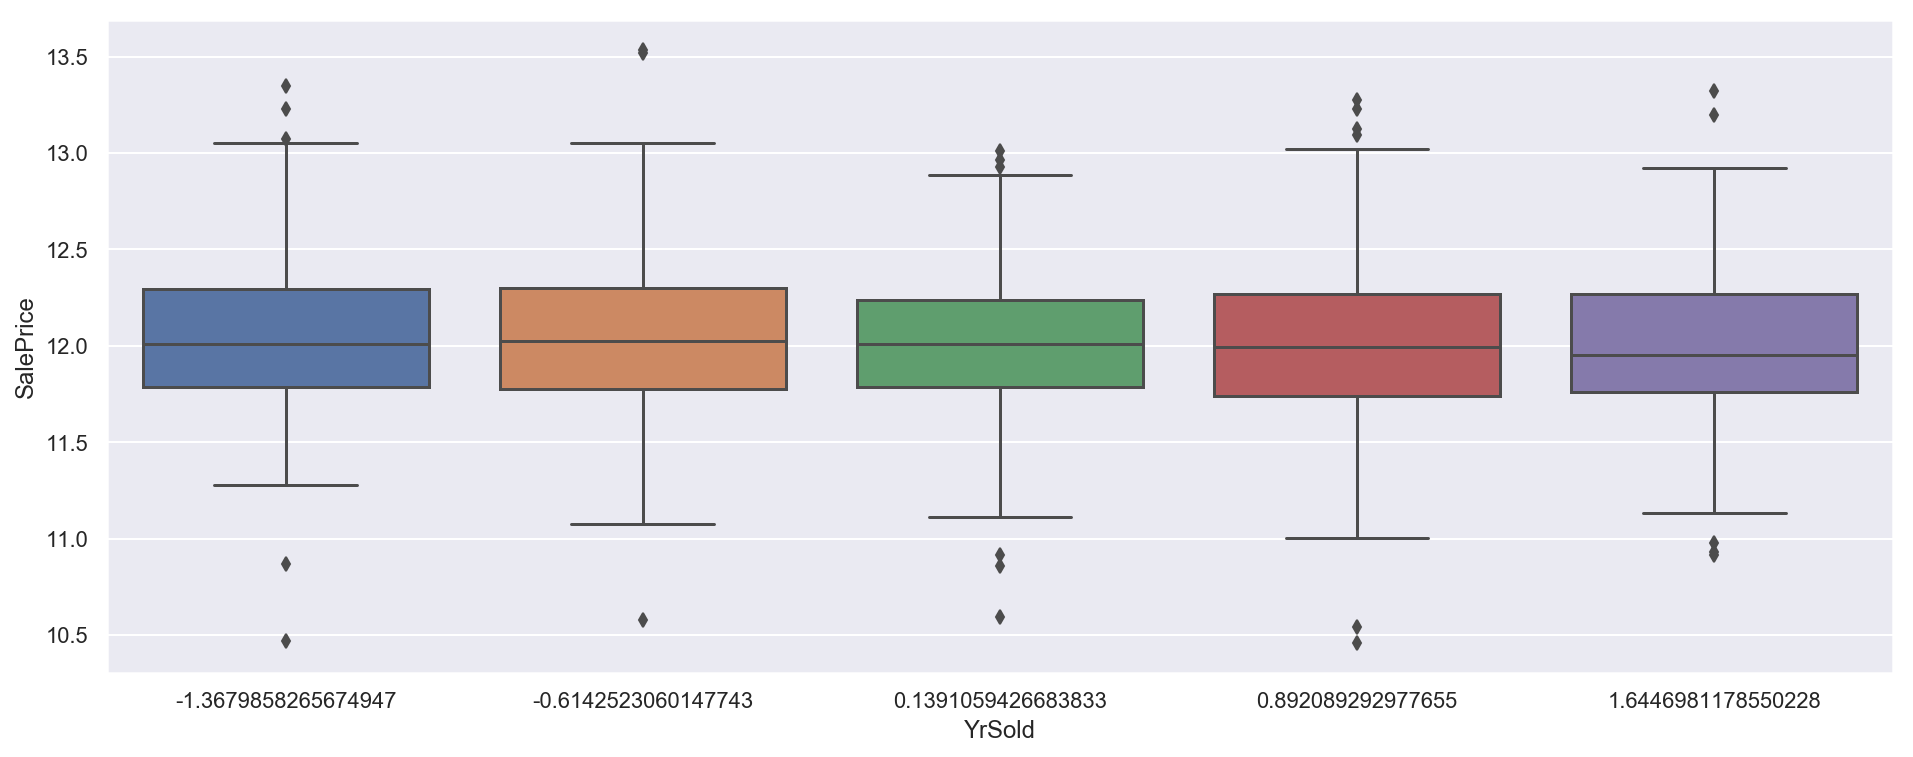

In [49]:
plt.figure(figsize=(16,6))
sns.boxplot(x='YrSold', y='SalePrice', data=date_sold_df);

**There is no clear difference in prices by month or year. We will remove these features from our model as they don't seem to provide much value.**

#### Features: Year Built & Year Remodeled

In [50]:
def house_remodel_and_age(df):
    # add flag is house has been remodeled (the year of the remodel is same as construction date 
    # if no remodeling or additions))
    df['is_remodeled'] = (df['YearRemodAdd'] != df['YearBuilt'])

    # add feature about the age of the house when sold
    df['age'] = df['YrSold'] - df['YearBuilt']

    # add flag if house was sold 2 years or less after it was built
    df['is_new_house'] = (df['YrSold'] - df['YearBuilt'] <= 2)

    # add flag is remodel was recent (i.e. within 2 years of the sale)
    df['is_recent_remodel'] = (df['YrSold'] - df['YearRemodAdd'] <= 2)
    
    # drop the original columns
    df = df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
    
    return df

In [51]:
house_remodel_and_age(train_df).head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street      Alley LotShape  \
0   1    0.424462       RL    -0.050433 -0.133270   Pave  UNDEFINED      Reg   
1   2   -1.125202       RL     0.541314  0.113413   Pave  UNDEFINED      Reg   
2   3    0.424462       RL     0.078009  0.420049   Pave  UNDEFINED      IR1   
3   4    0.645073       RL    -0.278068  0.103317   Pave  UNDEFINED      IR1   
4   5    0.424462       RL     0.680593  0.878431   Pave  UNDEFINED      IR1   

  LandContour Utilities  ...   MiscVal    MoSold    YrSold SaleType  \
0         Lvl    AllPub  ... -0.190481 -1.909325  0.139106       WD   
1         Lvl    AllPub  ... -0.190481 -0.279901 -0.614252       WD   
2         Lvl    AllPub  ... -0.190481  0.920928  0.139106       WD   
3         Lvl    AllPub  ... -0.190481 -1.909325 -1.367986       WD   
4         Lvl    AllPub  ... -0.190481  1.537684  0.139106       WD   

  SaleCondition  SalePrice is_remodeled       age  is_new_house  \
0        Normal  12.247699         True -0.906074          True   
1        Normal  12.109016         True -0.777697          True   
2        Normal  12.317171         True -0.841169          True   
3       Abnorml  11.849405         True  0.505804          True   
4        Normal  12.429220         True -0.808692          True   

  is_recent_remodel  
0              True  
1              True  
2              True  
3              True  
4              True  

[5 rows x 83 columns]

#### Features: Porch & Bathroom Square Footage

In [52]:
def bath_porch_sf(df):
    # total SF for bathroom
    df['TotalBath'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']) + \
    df['FullBath'] + (0.5 * df['HalfBath'])

    # Total SF for porch
    df['AllPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
    df['3SsnPorch'] + df['ScreenPorch']
    
    # drop the original columns
    df = df.drop(['BsmtFullBath', 'FullBath', 'HalfBath', 
                 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'], axis=1)
    
    return df

### Combine some features

In [53]:
# Encode qualitative variables first
train_df, test_df = encode_qual(train_df, test_df)

# Total SF for house (incl. basement)
train_df['AllSF'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']

# Total SF for 1st + 2nd floors
train_df['AllFlrsSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

# Overall quality of house
train_df['OverallGrade'] = train_df['OverallQual'] * train_df['OverallCond']

# Overall quality of the garage
train_df['GarageGrade'] = train_df['GarageQual_QE'] * train_df['GarageCond_QE']

# Overall quality of the exterior
train_df['ExterGrade'] = train_df['ExterQual_QE'] * train_df['ExterCond_QE']

# Overall kitchen score
train_df['KitchenScore'] = train_df['KitchenAbvGr'] * train_df['KitchenQual_QE']

# Overall fireplace score
train_df['FireplaceScore'] = train_df['Fireplaces'] * train_df['FireplaceQu_QE']

# Overall garage score
train_df['GarageScore'] = train_df['GarageArea'] * train_df['GarageGrade']

# Overall pool score
train_df['PoolScore'] = train_df['PoolArea'] * train_df['PoolQC_QE']

KeyError: 'GarageQual_QE'

Let's check whether or not these added features are correlated to the SalePrice

In [54]:
# Find whether combinations of features are more correlated to target than features by themselves
new_cols = ['AllSF', 'GrLivArea', 'TotalBsmtSF', 
            'AllFlrsSF', '1stFlrSF', '2ndFlrSF',
            'OverallGrade', 'OverallQual', 'OverallCond',
            'GarageGrade', 'GarageQual_QE', 'GarageCond_QE', 
            'ExterGrade', 'ExterQual_QE', 'ExterCond_QE', 
            'KitchenScore', 'KitchenAbvGr', 'KitchenQual_QE', 
            'FireplaceScore', 'Fireplaces', 'FireplaceQu_QE', 
            'GarageScore', 'GarageArea', 
            'PoolScore', 'PoolArea', 'PoolQC_QE', 
            'SalePrice']

corr = train_df[new_cols].corr()

plt.figure(figsize = (16,6))
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
# print(corr.SalePrice)
sns.heatmap(corr[['SalePrice']], vmax=1, square=True, cmap=sns.cm.rocket_r);

KeyError: "['FireplaceScore', 'GarageCond_QE', 'FireplaceQu_QE', 'ExterQual_QE', 'GarageScore', 'KitchenQual_QE', 'ExterCond_QE', 'GarageGrade', 'KitchenScore', 'PoolQC_QE', 'ExterGrade', 'PoolScore', 'GarageQual_QE'] not in index"

 Of the newly created features, we see that `AllSF`, `AllFlrsSF`, `PoolScore`, `ExterGrade`, `GarageScore`, `OverallGrade`, `KitchenScore` are highly correlated with the SalePrice, that is all the newly created features except for `GarageGrade`.
 We will add the highly correlated features to our model.

## Modeling

In [55]:
def combine_features(dfs_list):
    modified_dfs = []
    for df in dfs_list:
        # Total SF for house (incl. basement)
        df['AllSF'] = df['GrLivArea'] + df['TotalBsmtSF']

        # Total SF for 1st + 2nd floors
        df['AllFlrsSF'] = df['1stFlrSF'] + df['2ndFlrSF']

        # Overall quality of house
        df['OverallGrade'] = df['OverallQual'] * df['OverallCond']

        # Overall quality of the garage
        df['GarageGrade'] = df['GarageQual_QE'] * df['GarageCond_QE']

        # Overall quality of the exterior
        df['ExterGrade'] = df['ExterQual_QE'] * df['ExterCond_QE']

        # Overall kitchen score
        df['KitchenScore'] = df['KitchenAbvGr'] * df['KitchenQual_QE']

        # Overall fireplace score
        df['FireplaceScore'] = df['Fireplaces'] * df['FireplaceQu_QE']

        # Overall garage score
        df['GarageScore'] = df['GarageArea'] * df['GarageGrade']

        # Overall pool score
        df['PoolScore'] = df['PoolArea'] * df['PoolQC_QE']
        
        return modified_dfs

In [56]:
def modify_features(dfs_list, drop, make_binary, combine):
    modified_dfs = []
    for df in dfs_list:
        df = df.fillna(0)
        
        for vars_to_combine in combine:
            if len(vars_to_combine) > 2:
                raise ValueError('Only put 2 vars at a time to combine.') 
            combined_name = '_'.join(vars_to_combine[:])
            df[combined_name] = df[vars_to_combine[0]] + df[vars_to_combine[1]]
            drop = drop+vars_to_combine
        df = df.drop(columns=drop)
        modified_dfs.append(df)
    return modified_dfs

In [57]:
def fit_score_predict(train, test):
    X = train.drop(columns=['SalePrice'])
    y = train['SalePrice']
    
    # Basic Scoring
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_predictions = model.predict(X_test)
    score = math.sqrt(mean_squared_error(y_test, X_predictions))
    
    # Fit on full train data
    model.fit(X, y)
    predictions = model.predict(test)
    
    return (predictions, score)

In [58]:
def score_parameters(parameters, times):
    train_df = pd.read_csv('../input/train.csv')
    test_df = pd.read_csv('../input/test.csv')
    train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
    
    # remove outliers
    train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
    train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>6000)].index)
    
    # transform x and y variables
    train_df[quant_vars] = train_df[quant_vars].apply(lambda x: np.log1p(x))
    test_df[quant_vars] = test_df[quant_vars].apply(lambda x: np.log1p(x))
    
    # scale numeric variables
    scaler = StandardScaler()
    scaler.fit(train_df[quant_vars])
    scaled = scaler.transform(train_df[quant_vars])

    for i, col in enumerate(quant_vars):
        train_df[col] = scaled[:,i]

    scaled = scaler.fit_transform(test_df[quant_vars])

    for i, col in enumerate(quant_vars):
          test_df[col] = scaled[:,i]
        
    # apply some feature engineering
    train_df = house_remodel_and_age(train_df)
    test_df = house_remodel_and_age(test_df)
    
    train_df = bath_porch_sf(train_df)
    test_df = bath_porch_sf(test_df)
    
    # encode categorical feature
    train_df_encoded, test_df_encoded = encode_qual(train_df, test_df)
    
#     # combine features
#     train_df_encoded, test_df_encoded = combine_features([train_df_encoded, test_df_encoded])
    
    scores_df = pd.DataFrame(columns=['parameters', 'score', 'predictions'])
    while times > 0:
        for index, row in parameters.iterrows():
            mod_train, mod_test = modify_features([train_df_encoded.copy(), test_df_encoded.copy()], row['drop'], row['make_binary'], row['combine'])
            predictions, score = fit_score_predict(mod_train, mod_test)
            scores_df = scores_df.append({'parameters': index, 'score': score, 'predictions': predictions}, ignore_index=True)
        times -= 1
    return scores_df

In [59]:
def save_predictions(predictions):
    now = str(time.time()).split('.')[0]
    test_df = pd.read_csv('../input/test.csv')
    test_df['SalePrice'] = predictions
    # Transform the log price back to "real life" price
    test_df['SalePrice'] = test_df['SalePrice'].apply(lambda x: np.expm1(x))
    test_df[['Id', 'SalePrice']].to_csv('submit-'+ now + '.csv', index=False)

In [60]:
# TODO: `make_binary` is not yet functional

parameters = pd.DataFrame([
    {
        'drop': ['Id'], 
        'make_binary': [],
        'combine': []
    },
    {
        'drop': ['Id', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', '2ndFlrSF'], 
        'make_binary': [],
        'combine': []
    },
    {
        'drop': ['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', '2ndFlrSF'], 
        'make_binary': [],
        'combine': []
    },
    {
        'drop': ['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', '2ndFlrSF'], 
        'make_binary': [],
        'combine': [['GrLivArea', 'TotalBsmtSF']]
    },
    {
        'drop': ['Id', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF'], 
        'make_binary': [],
        'combine': [['GrLivArea', 'TotalBsmtSF']]
    },
    {
        'drop': ['Id'] + low_corr_vars.tolist(),
        'make_binary': [],
        'combine': [['GrLivArea', 'TotalBsmtSF']]
    },
    {
        'drop': ['Id'] + low_corr_vars.tolist(),
        'make_binary': [],
        'combine': [['GrLivArea', 'TotalBsmtSF'], ['1stFlrSF', '2ndFlrSF']]
    }
])

scores = score_parameters(parameters, 20)
scores.groupby('parameters')['score'].mean()

NameError: name 'low_corr_vars' is not defined

In [61]:
select_parameters = 5
predictions = scores.iloc[select_parameters]['predictions']
save_predictions(predictions)

NameError: name 'scores' is not defined